# Final Submission for Introduction to Data Analytics for Business

My Final Submission is a study of tech salaries from multinational companies based in Ireland. The salary data is scraped from Levels.fyi and I also merged stock data from the multinationals which is pulled from yahoo finance.
For Machine Learning - I tried to predict stock grants as part of a TCOMP package

# Import any Libraries required for the project

In [1]:
#One time only 
#!pip install pandas-datareader
#!pip install matplotlib

In [2]:
import pandas as pd 
import requests
import numpy as np 
from datetime import datetime 
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas_datareader as pdr
import warnings  # used to supress warnings
import matplotlib
from sklearn.model_selection import train_test_split #used to split data in machine learning
from sklearn.linear_model import LinearRegression  #library for linear regression
from sklearn.metrics import r2_score  #library for evaluating the model
from sklearn.preprocessing import StandardScaler , MinMaxScaler



# Import Levels.fyi data and StockMarket Data

In [3]:
#Import levels.fyi salary data using requests
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
df = pd.DataFrame(data)
df.to_csv("LevelsRawData1.csv")

In [4]:
# Define the stock tickers to download.
# Passing in a list of Tickers for each company I am interested in
tickers = ['XM','NOW','RPD','ZLNDY','ZEN','AMZN','CSCO','MSFT','GOOG','META','AAPL','MSFT', 'WDAY','GWRE','INTC','ORCL','TOST','ANET','MDB','HUBS','PICC','TWLO','EXPE','SSTK','VMW','TENB']
start_date = '2022-11-11'
end_date = '2022-11-11'

# Use pandas_reader.data.DataReader to load the desired data. 
stock_data = pdr.data.DataReader(tickers, 'yahoo', start_date, end_date)
stock_data.to_csv("StockData.csv")



# Inspect the levels.fyi and Stock dataframes

In [5]:
#check if the data has imported ok using head()
print ("Checking if Levels.fyi has imported ok: \n")
df.head()

Checking if Levels.fyi has imported ok: 



,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,,160,17,9,,,7392,807,1
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,,0,0,0,,,7419,807,2
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,,126,0,0,,,11527,819,3
3,6/14/2017 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,,92799,55371,23178,,,11521,819,5
4,6/16/2017 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,,156335,0,57840,,,1320,0,6


In [6]:
print ("\nChecking if StockData has imported ok: \n")
stock_data.head()


Checking if StockData has imported ok: 



Attributes Adj Close                                                       \
Symbols           XM         NOW        RPD  ZLNDY        ZEN        AMZN   
Date                                                                        
2022-11-11     11.48  409.910004  31.379999  17.25  76.699997  100.790001   

Attributes                                                ...    Volume  \
Symbols          CSCO        MSFT       GOOG        META  ...      TOST   
Date                                                      ...             
2022-11-11  44.790001  246.415558  96.730003  113.019997  ...  21973100   

Attributes                                                               \
Symbols        ANET      MDB     HUBS    PICC     TWLO     EXPE    SSTK   
Date                                                                      
2022-11-11  2874800  2790200  1201500  100600  6949700  3097500  255900   

Attributes                   
Symbols        VMW     TENB  
Date                         
2022-11-11  798900  1459200  

[1 rows x 150 columns]

In [7]:
#Check how many rows and columns are in the Levels.fyi dataframe
print("Levels.fyi rows and columns: ")
print(df.shape)

#Check how many rows and columns are in the Stockdata dataframe
print("\nStock data rows and columns: ")
print(stock_data.shape)

Levels.fyi rows and columns: 
(62642, 17)

Stock data rows and columns: 
(1, 150)


In [8]:
#Check the datatypes in both dataframes
print("Levels.fyi datatypes: ")
print(df.dtypes)
print("\nStockData datatypes: ")
print(stock_data.dtypes)


Levels.fyi datatypes: 
timestamp                  object
company                    object
level                      object
title                      object
totalyearlycompensation    object
location                   object
yearsofexperience          object
yearsatcompany             object
tag                        object
basesalary                 object
stockgrantvalue            object
bonus                      object
gender                     object
otherdetails               object
cityid                     object
dmaid                      object
rowNumber                   int64
dtype: object

StockData datatypes: 
Attributes  Symbols
Adj Close   XM         float64
            NOW        float64
            RPD        float64
            ZLNDY      float64
            ZEN        float64
                        ...   
Volume      TWLO         int64
            EXPE         int64
            SSTK         int64
            VMW          int64
            TENB         int64
L

In [9]:
# Examine dataframes to examine columns and structure
print("Levels.fyi Columns and Structure: ")
print(df.info())

print("\nStock Data Columns and Structure: ")
print(stock_data.info())

Levels.fyi Columns and Structure: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                62642 non-null  object
 1   company                  62642 non-null  object
 2   level                    62642 non-null  object
 3   title                    62642 non-null  object
 4   totalyearlycompensation  62642 non-null  object
 5   location                 62642 non-null  object
 6   yearsofexperience        62642 non-null  object
 7   yearsatcompany           62642 non-null  object
 8   tag                      62642 non-null  object
 9   basesalary               62642 non-null  object
 10  stockgrantvalue          62642 non-null  object
 11  bonus                    62642 non-null  object
 12  gender                   62642 non-null  object
 13  otherdetails             62642 non-null  object
 14  cit

# Inspecting the Levels.fyi Data

Looking at the data values in the individual columns of my Levels.fyi dataframe for anomolies

In [10]:
#Check the values for years at company for any anomolies
print('Unique values for YearsAtCompany: ')
print(df['yearsatcompany'].unique())
#Can see people have entered in values of 90 
#Check how many rows have 90 for years at company
print((df['yearsatcompany']=='90').sum(), ' outlier with value 90 for yearsatcompany. This should be cleaned up later.')


Unique values for YearsAtCompany: 
['1' '4' '0' '13' '6' '2' '3' '11' '5' '7' '19' '14' '8' '10' '12' '9'
 '22' '15' '25' '16' '18' '17' '27' '21' '43' '20' '24' '31' '29' '34'
 '23' '47' '28' '42' '26' '30' '32' '37' '36' '33' '35' '38' '90' '39']
1  outlier with value 90 for yearsatcompany. This should be cleaned up later.


In [11]:
#Check the values for years of experience for any anomolies
print('Unique values for YearsOfExperience: ')
df['yearsofexperience'].unique()
#Can see people have entered in values of 90 - these rows should be dropped
#Check how many rows have 90 for years of experience
print((df['yearsofexperience']=='90').sum(), ' outlier with value 90 for Years Of Experience. This should be cleaned up later.')

Unique values for YearsOfExperience: 
1  outlier with value 90 for Years Of Experience. This should be cleaned up later.


In [12]:
#Check the values for gender for any anomolies
print('Checking the Gender Column for anomalies: ')
print(df['gender'].unique())
#I can see nulls, Male, Female, Other, Title: Senior Software Engineer - this will need to be cleaned up also
print('Null values and Invalid rows will be cleaned up later. ')


Checking the Gender Column for anomalies: 
['' 'Male' 'Female' 'Other' 'Title: Senior Software Engineer']
Null values and Invalid rows will be cleaned up later. 


In [13]:
#Check the values for title for any anomolies
print('Checking Titles: ')
print(df['title'].unique())
#Titles look ok


Checking Titles: 
['Product Manager' 'Software Engineer' 'Software Engineering Manager'
 'Data Scientist' 'Solution Architect' 'Technical Program Manager'
 'Human Resources' 'Product Designer' 'Marketing' 'Business Analyst'
 'Hardware Engineer' 'Sales' 'Recruiter' 'Mechanical Engineer'
 'Management Consultant']


In [14]:
#dealing with NA's.  This function gives output in a single value if any null is present or not.
print('Checking for na values: ')
print (df.isna().sum())
# 0 in all column means there are no null values present in our dataset. If there was - I would have used the fillna() function to replace them with another value.

Checking for na values: 
timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      0
rowNumber                  0
dtype: int64


In [15]:
#Check for Nulls
df.isnull().sum()
#All 0s mean there are none

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      0
rowNumber                  0
dtype: int64

In [16]:
#Check for duplicates
print('Checking for duplicate rows: ')
print(df.duplicated().sum(), ' duplicate row(s) present.')


Checking for duplicate rows: 
0  duplicate row(s) present.


In [17]:
# Check if rownumber is unique - I will use this as my index
df['rowNumber'].is_unique

True

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                62642 non-null  object
 1   company                  62642 non-null  object
 2   level                    62642 non-null  object
 3   title                    62642 non-null  object
 4   totalyearlycompensation  62642 non-null  object
 5   location                 62642 non-null  object
 6   yearsofexperience        62642 non-null  object
 7   yearsatcompany           62642 non-null  object
 8   tag                      62642 non-null  object
 9   basesalary               62642 non-null  object
 10  stockgrantvalue          62642 non-null  object
 11  bonus                    62642 non-null  object
 12  gender                   62642 non-null  object
 13  otherdetails             62642 non-null  object
 14  cityid                   62642 non-nul

# Cleaning the Data

I can see that a number of rows in my dataframe require cleaning: 

    I have extra columns that I dont require.  
    I have duplicate rows to clean
    My Columns are all being treated as Objects, but should be dates, floats, integars etc
    I have invalid entries for Gender


In [19]:
# Drop unwanted columns
df.drop(columns=['otherdetails','dmaid'], inplace=True)

#Check the dataframe again to confirm columns are gone
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                62642 non-null  object
 1   company                  62642 non-null  object
 2   level                    62642 non-null  object
 3   title                    62642 non-null  object
 4   totalyearlycompensation  62642 non-null  object
 5   location                 62642 non-null  object
 6   yearsofexperience        62642 non-null  object
 7   yearsatcompany           62642 non-null  object
 8   tag                      62642 non-null  object
 9   basesalary               62642 non-null  object
 10  stockgrantvalue          62642 non-null  object
 11  bonus                    62642 non-null  object
 12  gender                   62642 non-null  object
 13  cityid                   62642 non-null  object
 14  rowNumber                62642 non-nul

In [20]:
#Replace empty and invalid entries for gender with NotDisclosed
df['gender'].replace(['Title: Senior Software Engineer',''],'NotDisclosed', inplace=True)
print(df['gender'].unique())

['NotDisclosed' 'Male' 'Female' 'Other']


In [21]:
#Replace empty tag values with the string NotDisclosed
df['tag'].replace('','NotDisclosed', inplace=True)
print(df['tag'].unique())

['NotDisclosed' 'Full Stack' 'Distributed Systems (Back-End)' ...
 'Marketing Technology' 'Program Manager II' 'Product Infra']


In [22]:
#Drop duplicate row if required
df.drop_duplicates (subset=None, keep='first', inplace=True)
#Check again for duplicates - they should be gone now
print(df.duplicated().sum(),' duplicate row(s) present.')

0  duplicate row(s) present.


In [23]:
# Convert some of the numeric columns that are classified as type 'object' to float and integar values
df[["totalyearlycompensation","basesalary","stockgrantvalue","bonus",]]=df[["totalyearlycompensation","basesalary","stockgrantvalue","bonus",]].astype(float)
df[["yearsofexperience","yearsatcompany","cityid"]]=df[["yearsofexperience","yearsatcompany","cityid"]].astype(int)
print (df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62642 entries, 0 to 62641
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62642 non-null  object 
 2   level                    62642 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  float64
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  int32  
 7   yearsatcompany           62642 non-null  int32  
 8   tag                      62642 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   62642 non-null  object 
 13  cityid                   62642 non-null  int32  
 14  rowNumber             

In [24]:
#Remove rows of data where the person has entered that they have over 50 years in the company
print('Maximum number of years in Company: ',df['yearsatcompany'].max())
print('Maximum number of years of Experience: ',df['yearsofexperience'].max())
print ('Cleaning up entries > 50 for YearsAtCompany and YearsOfExperience')
df=df[df['yearsatcompany']<51]
df=df[df['yearsofexperience']<51]
print('Maximum number of years in Company: ',df['yearsatcompany'].max())
print('Maximum number of years of Experience: ',df['yearsofexperience'].max())

Maximum number of years in Company:  90
Maximum number of years of Experience:  90
Cleaning up entries > 50 for YearsAtCompany and YearsOfExperience
Maximum number of years in Company:  47
Maximum number of years of Experience:  50


In [25]:
#Convert all Company values to upper case to clean up examples such as amazon Amazon AMAZON
df['company']=df['company'].str.upper()
df['company']=df['company'].str.strip()


In [26]:
#Convert timestamp to pandas datetime and keep just the date portion
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date


In [27]:
df.dtypes

timestamp                   object
company                     object
level                       object
title                       object
totalyearlycompensation    float64
location                    object
yearsofexperience            int32
yearsatcompany               int32
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
cityid                       int32
rowNumber                    int64
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62633 entries, 0 to 62641
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62633 non-null  object 
 1   company                  62633 non-null  object 
 2   level                    62633 non-null  object 
 3   title                    62633 non-null  object 
 4   totalyearlycompensation  62633 non-null  float64
 5   location                 62633 non-null  object 
 6   yearsofexperience        62633 non-null  int32  
 7   yearsatcompany           62633 non-null  int32  
 8   tag                      62633 non-null  object 
 9   basesalary               62633 non-null  float64
 10  stockgrantvalue          62633 non-null  float64
 11  bonus                    62633 non-null  float64
 12  gender                   62633 non-null  object 
 13  cityid                   62633 non-null  int32  
 14  rowNumber             

In [29]:
#Set the index on rownumber
#df.reset_index(inplace = True)
df.set_index('rowNumber',inplace=True)

In [30]:
#Rename columns for readability
df.columns = ["Date","Company","Level","Title","TCOMP","Location","YearsOfExperience","YearsOfService","Tag","BaseSalary","StockGrant","Bonus", "Gender", "CityId"]

In [31]:
#check that the un-required columns are gone from the dataframe and that the numeric values are no longer showing as object types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62633 entries, 1 to 83875
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               62633 non-null  object 
 1   Company            62633 non-null  object 
 2   Level              62633 non-null  object 
 3   Title              62633 non-null  object 
 4   TCOMP              62633 non-null  float64
 5   Location           62633 non-null  object 
 6   YearsOfExperience  62633 non-null  int32  
 7   YearsOfService     62633 non-null  int32  
 8   Tag                62633 non-null  object 
 9   BaseSalary         62633 non-null  float64
 10  StockGrant         62633 non-null  float64
 11  Bonus              62633 non-null  float64
 12  Gender             62633 non-null  object 
 13  CityId             62633 non-null  int32  
dtypes: float64(4), int32(3), object(7)
memory usage: 6.5+ MB


In [32]:
#Maybe split the Location column?
#df[['City','Code']] = df['Location'].str.split(' ', expand=True)

In [33]:
df.describe()

,TCOMP,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus,CityId
count,6.263300e+04,62633.000000,62633.000000,6.263300e+04,6.263300e+04,62633.000000,62633.000000
mean,3.175749e+03,7.183673,2.698242,1.798378e+03,1.135023e+03,242.347964,9856.130331
std,3.878154e+04,6.406633,3.504292,1.927331e+04,2.520792e+04,3709.453282,6679.329011
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.160000e+02,3.000000,0.000000,8.800000e+01,0.000000e+00,1.000000,7369.000000
50%,1.830000e+02,6.000000,1.000000,1.310000e+02,2.300000e+01,13.000000,7839.000000
75%,2.690000e+02,10.000000,4.000000,1.810000e+02,6.400000e+01,27.000000,11521.000000
max,3.386013e+06,50.000000,47.000000,2.057772e+06,3.140803e+06,384026.000000,47926.000000


In [34]:
#Filter outliers - filter top and bottom 5%
#Remove rows with a BaseSalary of 0
df = df[df['BaseSalary'].between(df['BaseSalary'].quantile(.05),df['BaseSalary'].quantile(.95))]
df = df[df['TCOMP'].between(df['TCOMP'].quantile(.05),df['TCOMP'].quantile(.95))]
df = df[df['StockGrant'].between(df['StockGrant'].quantile(.05),df['StockGrant'].quantile(.95))]
df = df[df['Bonus'].between(df['Bonus'].quantile(.05),df['Bonus'].quantile(.95))]
df = df[df['BaseSalary']!= 0]

In [35]:
df.describe()

,TCOMP,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus,CityId
count,45897.000000,45897.000000,45897.000000,45897.000000,45897.000000,45897.000000,45897.000000
mean,181.070745,6.486415,2.525786,134.623701,31.520404,14.926640,9752.499902
std,72.590615,5.963597,3.313331,50.755857,33.857589,13.051581,6149.760254
min,61.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000
25%,124.000000,2.000000,0.000000,94.000000,1.000000,4.000000,7416.000000
50%,173.000000,5.000000,1.000000,129.000000,21.000000,13.000000,8198.000000
75%,229.000000,9.000000,3.000000,170.000000,49.000000,23.000000,11521.000000
max,421.000000,50.000000,42.000000,270.000000,138.000000,54.000000,47926.000000


In [36]:
#Export the clean dataframe
df.to_csv('Levels_Clean.csv')

# Take a quick look at the levels dataframe values

In [37]:
#Mean Number of years the person was in the company at the time of the survey
print("Mean Years of Service: " + str(df['YearsOfService'].mean()))

#Average Number of years of Experience the person had at the time of the survey
print("Mean Years of Experience: " + str(df['YearsOfExperience'].mean()))


Mean Years of Service: 2.5257859990849076
Mean Years of Experience: 6.486415234111162


In [38]:
# Are there any entries for Intel?
Intel=(df['Company'] == 'INTEL')
df.loc[Intel]
#799 entries

,Date,Company,Level,Title,TCOMP,Location,YearsOfExperience,YearsOfService,Tag,BaseSalary,StockGrant,Bonus,Gender,CityId
rowNumber,,,,,,,,,,,,,,
136,2017-10-31,INTEL,G6,Software Engineering Manager,158.0,"Hillsboro, OR",9,3,NotDisclosed,136.0,12.0,10.0,NotDisclosed,10500
558,2018-04-30,INTEL,Staff (Grade 8),Software Engineer,167.0,"Hillsboro, OR",5,5,NotDisclosed,141.0,15.0,11.0,Male,10500
665,2018-05-17,INTEL,Grade 7,Software Engineer,247.0,"Sunnyvale, CA",0,2,NotDisclosed,201.0,13.0,33.0,Male,7472
735,2018-05-26,INTEL,G8,Software Engineer,276.0,"Santa Clara, CA",6,5,NotDisclosed,211.0,27.0,38.0,Male,7434
830,2018-06-05,INTEL,5,Software Engineer,161.0,"Santa Clara, CA",2,2,DevOps,141.0,7.0,13.0,Female,7434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83310,2021-08-13,INTEL,6,Hardware Engineer,70.0,"Taipei, TP, Taiwan",3,0,Application engineer,61.0,7.0,2.0,Male,6744
83518,2021-08-15,INTEL,L5,Software Engineer,73.0,"Haifa, HA, Israel",12,10,API Development (Back-End),56.0,3.0,14.0,Male,4037
83559,2021-08-15,INTEL,Grade 7,Software Engineer,220.0,"Hillsboro, OH",3,3,ML / AI,192.0,5.0,23.0,NotDisclosed,10304


In [39]:
#Which Companies are located in Ireland
InIreland=df[df["Location"].str.contains("Ireland")]
print(InIreland['Company'].unique())
# Convert to List
FilteredCompanies=InIreland.Company.unique().tolist()

['AMAZON' 'GOOGLE' 'INTERCOM' 'WORKDAY' 'FACEBOOK' 'MICROSOFT' 'ORACLE'
 'JPMORGAN CHASE' 'CIRCLECI' 'ARISTA NETWORKS' 'DELL TECHNOLOGIES'
 'MONGODB' 'FIDELITY INVESTMENTS' 'HUBSPOT' 'CISCO' 'PIVOTAL' 'TWILIO'
 'GROUPON' 'SLACK' 'GENERAL MOTORS' 'INTEL' 'EXPEDIA' 'ARM' 'STRIPE' 'AWS'
 'ANALOG DEVICES' 'DELOITTE' 'QUALCOMM' 'N/A' 'SHUTTERSTOCK' 'VMWARE'
 'HUAWEI' 'APPLE' 'IBM' 'XILINX' 'ZENDESK' 'NOKIA' 'ZALANDO'
 'WALMART LABS' 'HPE' 'QUALTRICS' 'INFOSYS' 'MASTERCARD' 'SERVICENOW'
 'QUANTCAST' 'PINTEREST' 'EQUIFAX' 'WORKHUMAN' 'ACCENTURE' 'ERICSSON'
 'LINKEDIN' 'RIOT GAMES' 'RAPID7' 'DEUTSCHE BANK' 'REDDIT' 'AMDOCS'
 'BNY MELLON' 'SAP' 'SQUARESPACE' 'VIASAT'
 'SUSQUEHANNA INTERNATIONAL GROUP' 'FIREEYE' 'GITLAB']


# Filter the dataframe for Multinational Companies of Interest based in Ireland

In [40]:
print(FilteredCompanies)

['AMAZON', 'GOOGLE', 'INTERCOM', 'WORKDAY', 'FACEBOOK', 'MICROSOFT', 'ORACLE', 'JPMORGAN CHASE', 'CIRCLECI', 'ARISTA NETWORKS', 'DELL TECHNOLOGIES', 'MONGODB', 'FIDELITY INVESTMENTS', 'HUBSPOT', 'CISCO', 'PIVOTAL', 'TWILIO', 'GROUPON', 'SLACK', 'GENERAL MOTORS', 'INTEL', 'EXPEDIA', 'ARM', 'STRIPE', 'AWS', 'ANALOG DEVICES', 'DELOITTE', 'QUALCOMM', 'N/A', 'SHUTTERSTOCK', 'VMWARE', 'HUAWEI', 'APPLE', 'IBM', 'XILINX', 'ZENDESK', 'NOKIA', 'ZALANDO', 'WALMART LABS', 'HPE', 'QUALTRICS', 'INFOSYS', 'MASTERCARD', 'SERVICENOW', 'QUANTCAST', 'PINTEREST', 'EQUIFAX', 'WORKHUMAN', 'ACCENTURE', 'ERICSSON', 'LINKEDIN', 'RIOT GAMES', 'RAPID7', 'DEUTSCHE BANK', 'REDDIT', 'AMDOCS', 'BNY MELLON', 'SAP', 'SQUARESPACE', 'VIASAT', 'SUSQUEHANNA INTERNATIONAL GROUP', 'FIREEYE', 'GITLAB']


In [41]:
#I only want to see companies located in Ireland
Filtereddf=(df['Company'].isin(FilteredCompanies)  & df['Location'].str.contains('Ireland',na=False))
CompaniesInIrelanddf=df.loc[Filtereddf]
#CompaniesInIrelanddf
print(CompaniesInIrelanddf['Company'].unique())

['AMAZON' 'GOOGLE' 'INTERCOM' 'WORKDAY' 'FACEBOOK' 'MICROSOFT' 'ORACLE'
 'JPMORGAN CHASE' 'CIRCLECI' 'ARISTA NETWORKS' 'DELL TECHNOLOGIES'
 'MONGODB' 'FIDELITY INVESTMENTS' 'HUBSPOT' 'CISCO' 'PIVOTAL' 'TWILIO'
 'GROUPON' 'SLACK' 'GENERAL MOTORS' 'INTEL' 'EXPEDIA' 'ARM' 'STRIPE' 'AWS'
 'ANALOG DEVICES' 'DELOITTE' 'QUALCOMM' 'N/A' 'SHUTTERSTOCK' 'VMWARE'
 'HUAWEI' 'APPLE' 'IBM' 'XILINX' 'ZENDESK' 'NOKIA' 'ZALANDO'
 'WALMART LABS' 'HPE' 'QUALTRICS' 'INFOSYS' 'MASTERCARD' 'SERVICENOW'
 'QUANTCAST' 'PINTEREST' 'EQUIFAX' 'WORKHUMAN' 'ACCENTURE' 'ERICSSON'
 'LINKEDIN' 'RIOT GAMES' 'RAPID7' 'DEUTSCHE BANK' 'REDDIT' 'AMDOCS'
 'BNY MELLON' 'SAP' 'SQUARESPACE' 'VIASAT'
 'SUSQUEHANNA INTERNATIONAL GROUP' 'FIREEYE' 'GITLAB']


In [42]:
CompaniesInIrelanddf.describe()

,TCOMP,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus,CityId
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,134.232558,7.472868,2.333333,99.379845,24.240310,10.612403,4682.984496
std,53.016995,5.180895,3.047825,38.523871,27.168383,10.570357,3879.736697
min,61.000000,0.000000,0.000000,40.000000,0.000000,0.000000,4013.000000
25%,94.000000,3.000000,1.000000,69.000000,1.250000,1.000000,4015.000000
50%,124.000000,7.000000,1.000000,91.500000,16.000000,8.000000,4015.000000
75%,166.000000,11.000000,3.000000,122.000000,34.750000,16.000000,4015.000000
max,297.000000,31.000000,30.000000,237.000000,133.000000,43.000000,28920.000000


In [43]:
#Top 10 Companies in Ireland for TCOMP using pivot
CompaniesInIrelanddf.to_csv("CompaniesInIrelanddf.csv")
table = pd.pivot_table(data=CompaniesInIrelanddf, 
                        index=['Company'], values=['TCOMP','BaseSalary', 'StockGrant']).sort_values(['TCOMP'], ascending=[False])
print ('Top 10 Companies in Ireland for TCOMP: ')
print(table.head(10))

#Top 10 Companies in Ireland for SalaryGrant using pivot
table2 = pd.pivot_table(data=CompaniesInIrelanddf, 
                        index=['Company'], values=['StockGrant']).sort_values(['StockGrant'], ascending=[False])
print("\n")
print ('Top 10 Companies in Ireland for StockGrant: ')
print(table2.head(10))


Top 10 Companies in Ireland for TCOMP: 
              BaseSalary  StockGrant       TCOMP
Company                                         
GROUPON       189.000000   38.000000  263.000000
MONGODB       133.000000  119.000000  252.000000
SQUARESPACE   182.000000   28.000000  210.000000
HUAWEI        165.500000   11.000000  203.500000
STRIPE        131.250000   55.000000  195.750000
REDDIT        176.500000   19.000000  195.500000
QUALTRICS     138.000000   46.000000  191.000000
SHUTTERSTOCK  152.500000    9.000000  174.500000
FACEBOOK      111.705882   43.117647  170.529412
WALMART LABS  106.800000   31.000000  164.800000


Top 10 Companies in Ireland for StockGrant: 
           StockGrant
Company              
MONGODB    119.000000
SLACK       64.000000
STRIPE      55.000000
FIREEYE     54.000000
PINTEREST   52.000000
QUALTRICS   46.000000
LINKEDIN    45.500000
FACEBOOK    43.117647
TWILIO      43.000000
INTEL       43.000000


In [44]:
#Top TCOMP Companies - sorted by BaseSalary  value
IrishBaseSalarySorted=CompaniesInIrelanddf.sort_values(['BaseSalary'],ascending=False)
IrishBaseSalarySorted.head()

#I can see that a Software Engineer in STRIPE with 7 years of experience is earning a TCOMP package of 297K

,Date,Company,Level,Title,TCOMP,Location,YearsOfExperience,YearsOfService,Tag,BaseSalary,StockGrant,Bonus,Gender,CityId
rowNumber,,,,,,,,,,,,,,
82931,2021-08-12,HUAWEI,19,Software Engineer,283.0,"Dublin, DN, Ireland",5,1,Distributed Systems (Back-End),237.0,22.0,24.0,Male,4015
65254,2021-04-12,FACEBOOK,IC5,Software Engineer,296.0,"Dublin, DN, Ireland",3,5,Full Stack,214.0,62.0,20.0,NotDisclosed,4015
73309,2021-06-10,REDDIT,IC4,Software Engineer,207.0,"Dublin, DN, Ireland",8,3,Full Stack,207.0,0.0,0.0,Male,4015
55946,2021-01-30,ZALANDO,C8,Software Engineer,225.0,"Dublin, DN, Ireland",15,4,Distributed Systems (Back-End),206.0,17.0,2.0,NotDisclosed,4015
70413,2021-05-20,MICROSOFT,64,Software Engineer,253.0,"Dublin, DN, Ireland",15,3,API Development (Back-End),203.0,16.0,34.0,Male,4015


In [45]:
#Using mean, min and max functions
IrishBaseSalaryStatistics=IrishBaseSalarySorted.groupby('Company')['BaseSalary'].agg(['mean', 'min', 'max'])
#IrishBaseSalaryStatistics.to_csv("IrishBaseSalaryStatistics1.csv")
print("Base Salary Statistics for Companies located in Ireland: \n",IrishBaseSalaryStatistics)

Base Salary Statistics for Companies located in Ireland: 
                       mean    min    max
Company                                 
ACCENTURE       103.000000  103.0  103.0
AMAZON          102.810345   53.0  176.0
AMDOCS           92.000000   92.0   92.0
ANALOG DEVICES   56.333333   46.0   63.0
APPLE            62.500000   48.0   77.0
...                    ...    ...    ...
WORKDAY          84.875000   55.0  181.0
WORKHUMAN        98.500000   79.0  111.0
XILINX           68.000000   68.0   68.0
ZALANDO         120.000000   59.0  206.0
ZENDESK          81.285714   48.0  137.0

[63 rows x 3 columns]


In [46]:
#company years of service statistics
#Top 10 Companies in Ireland for retaining staff using pivot
YOStable = pd.pivot_table(data=CompaniesInIrelanddf, 
                        index=['Company'], values=['YearsOfService']).sort_values(['YearsOfService'], ascending=[False])
print ('Top 10 Companies in Ireland for retaining staff: ')
print(YOStable.head(10))


Top 10 Companies in Ireland for retaining staff: 
                                 YearsOfService
Company                                        
IBM                                   10.666667
INTEL                                  9.000000
CIRCLECI                               9.000000
FIREEYE                                8.000000
EXPEDIA                                7.000000
AWS                                    7.000000
NOKIA                                  7.000000
SUSQUEHANNA INTERNATIONAL GROUP        5.000000
HPE                                    5.000000
MASTERCARD                             4.000000


In [47]:

#Which top 10 job titles have the best average salary

BestSalarytable = pd.pivot_table(data=CompaniesInIrelanddf, 
                        index=['Tag'], values=['BaseSalary']).sort_values(['BaseSalary'], ascending=[False])
print ('Top 10 Job titles in Ireland for Average salary: \n')
print(BestSalarytable.head(10))




Top 10 Job titles in Ireland for Average salary: 

                       BaseSalary
Tag                              
Software developer          191.0
python, spark, hadoop       151.0
Cloud Computing             141.0
Enterprise                  138.0
Technical Services          133.0
Product Marketing           129.0
Customer                    127.0
SRE                         125.0
Platform integrity          124.0
Growth                      123.5


In [48]:
#Which top 10 Companies give the best average StockGrant

BestSalarytable = pd.pivot_table(data=CompaniesInIrelanddf, 
                        index=['Company'], values=['StockGrant']).sort_values(['StockGrant'], ascending=[False])
print ('Top 10 Companies in Ireland for Average Stockgrant: \n')
print(BestSalarytable.head(10))


Top 10 Companies in Ireland for Average Stockgrant: 

           StockGrant
Company              
MONGODB    119.000000
SLACK       64.000000
STRIPE      55.000000
FIREEYE     54.000000
PINTEREST   52.000000
QUALTRICS   46.000000
LINKEDIN    45.500000
FACEBOOK    43.117647
TWILIO      43.000000
INTEL       43.000000


In [49]:
#export the CompaniesInIrelanddf dataframe to a csv file
CompaniesInIrelanddf.to_csv('CompaniesInIreland_SalaryData.csv')

<AxesSubplot:>

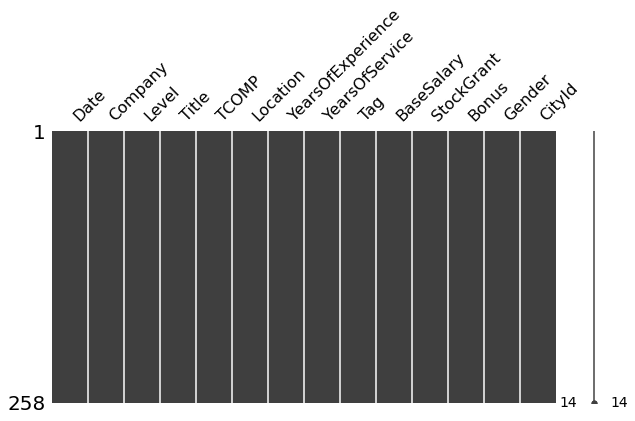

In [50]:
msno.matrix(CompaniesInIrelanddf, figsize=(10, 5))

In [51]:
CompaniesInIrelanddf_filtered=CompaniesInIrelanddf
CompaniesInIrelanddf_filtered.to_csv('CompaniesInIreland_SalaryData_filtered.csv')

# Visualize our Data

Visualisations are on our dataframe which has been filtered to Companies in Ireland. Data outliers have been cleaned up.

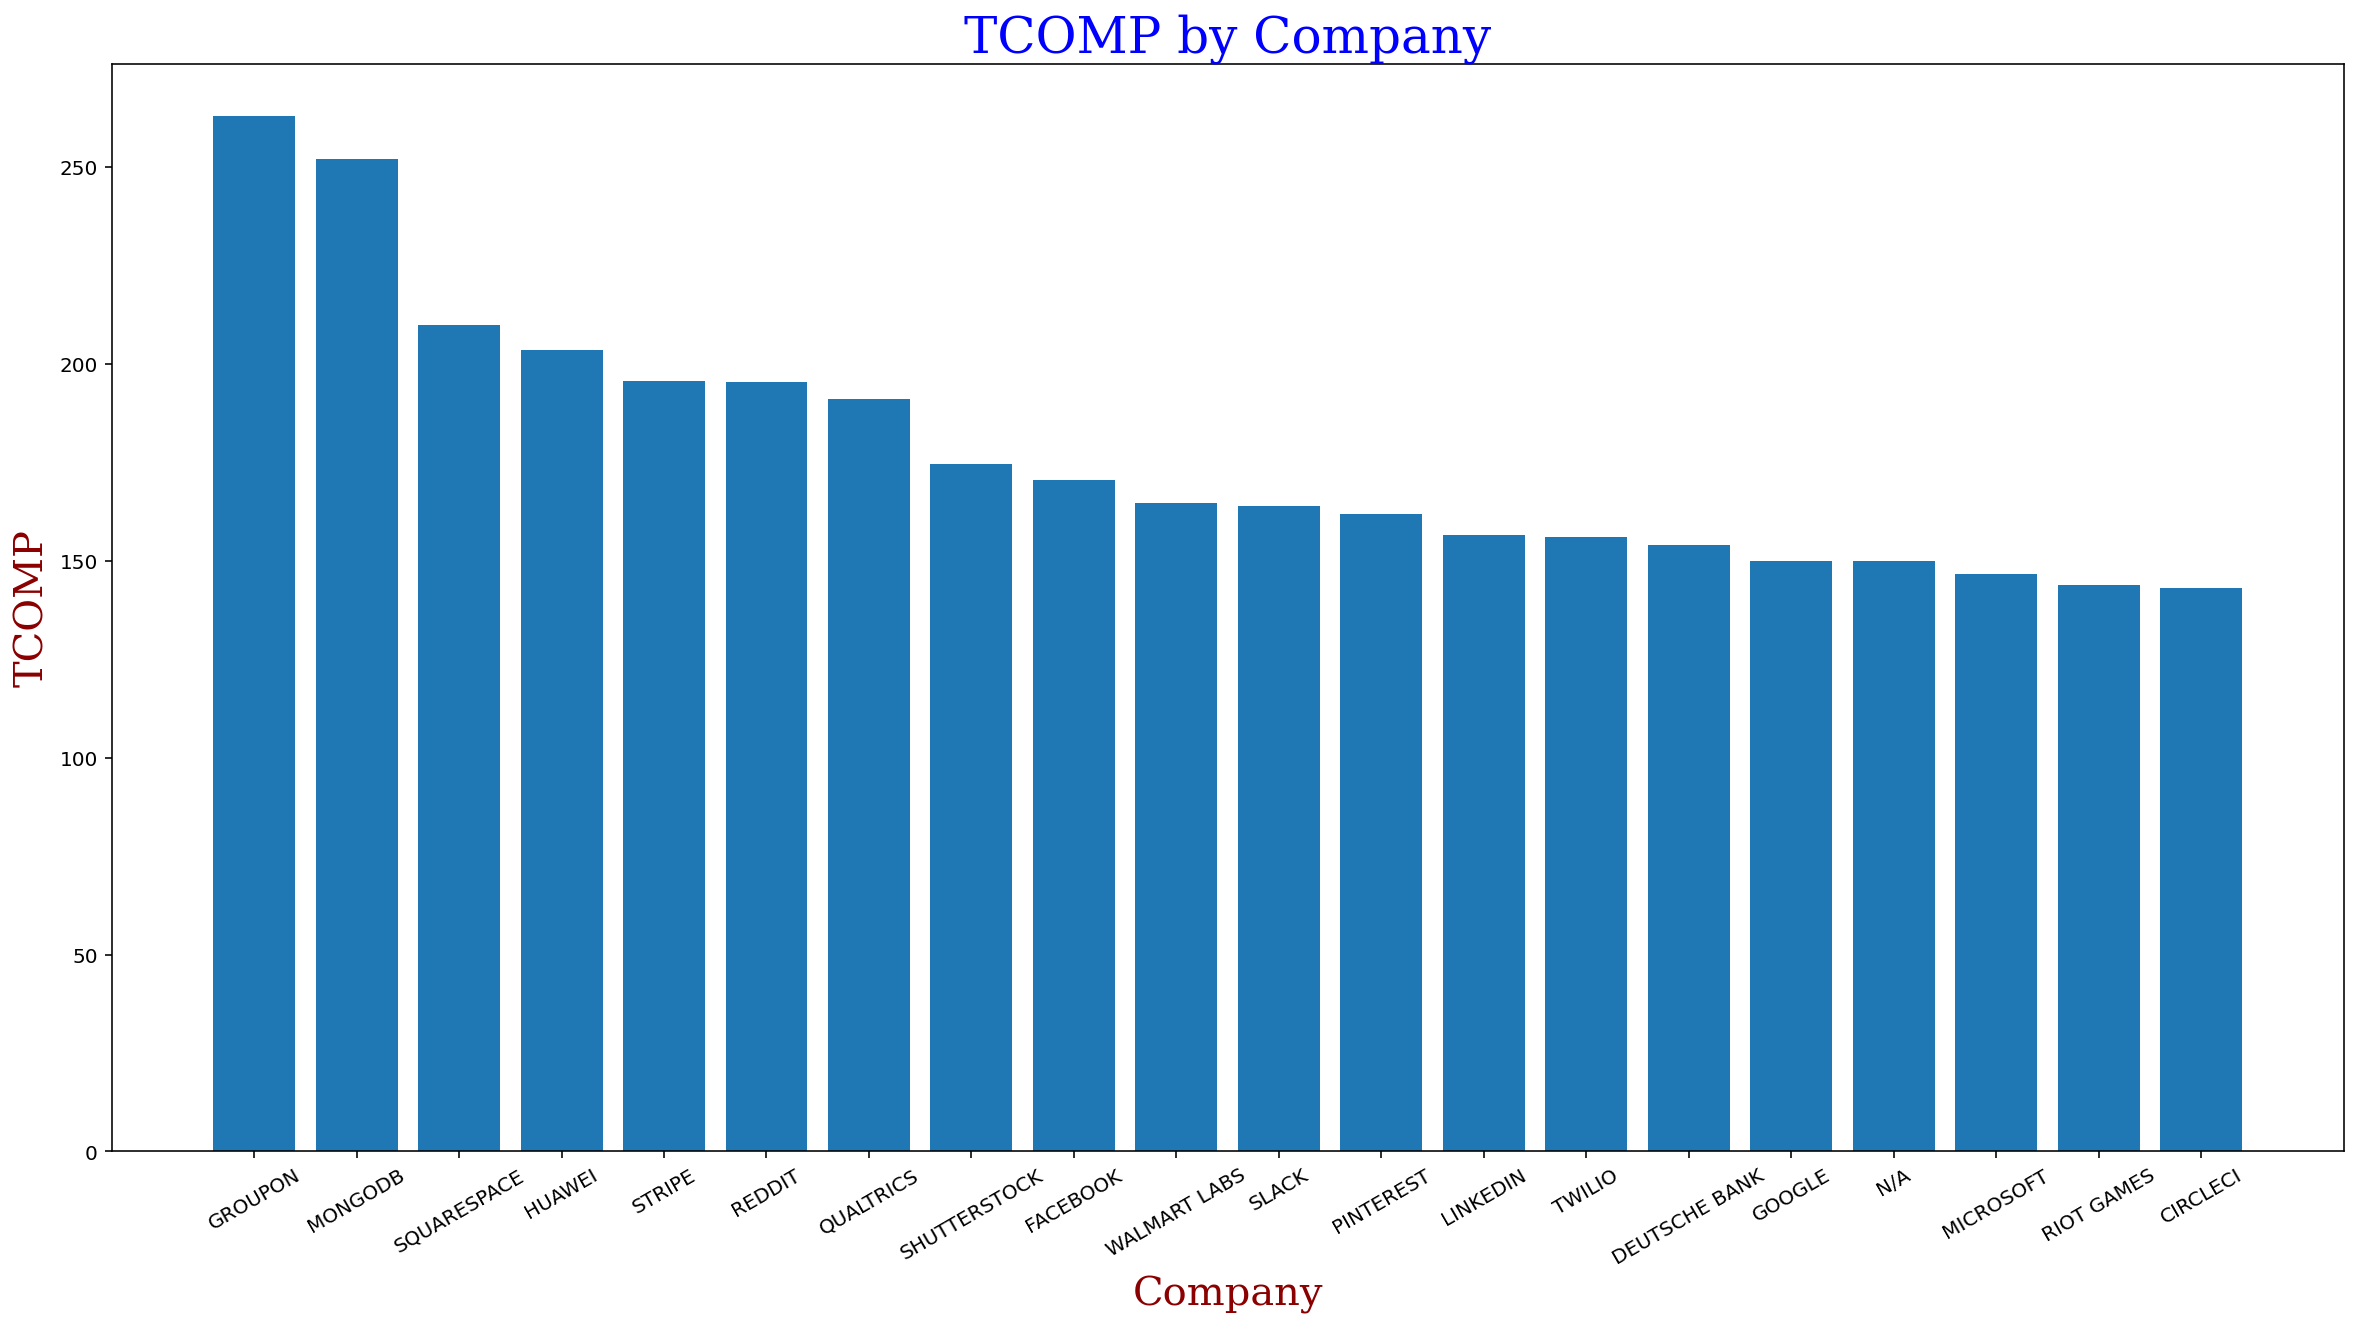

In [52]:
#Visualise TCOMP for top 10 companies
TCOMPChart=CompaniesInIrelanddf_filtered.groupby(['Company'])['TCOMP'].mean().reset_index().sort_values('TCOMP',ascending = False )

# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [20, 10]
# Set up with a higher resolution screen
%config InlineBackend.figure_format = 'retina'

TCOMPChartTop10=TCOMPChart.nlargest(n=20, columns=['TCOMP'], keep="all")
#print(TCOMPChart.head(10))


font1 = {'family':'serif','color':'blue','size':25}
font2 = {'family':'serif','color':'darkred','size':20}

#Rotate the x-axis labels and define labels
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel("TCOMP" , fontdict = font2)
plt.xlabel("Company" , fontdict = font2)
plt.title("TCOMP by Company" , fontdict = font1) 
plt.bar(TCOMPChartTop10["Company"],TCOMPChartTop10["TCOMP"])
plt.show()




         Company        Gender  BaseSalary
33        HUAWEI          Male       237.0
64        REDDIT          Male       207.0
31       GROUPON  NotDisclosed       189.0
79  WALMART LABS  NotDisclosed       187.0
72   SQUARESPACE          Male       182.0


<AxesSubplot:title={'center':'BaseSalary by Company and Gender using Seaborn'}, xlabel='Company', ylabel='BaseSalary'>

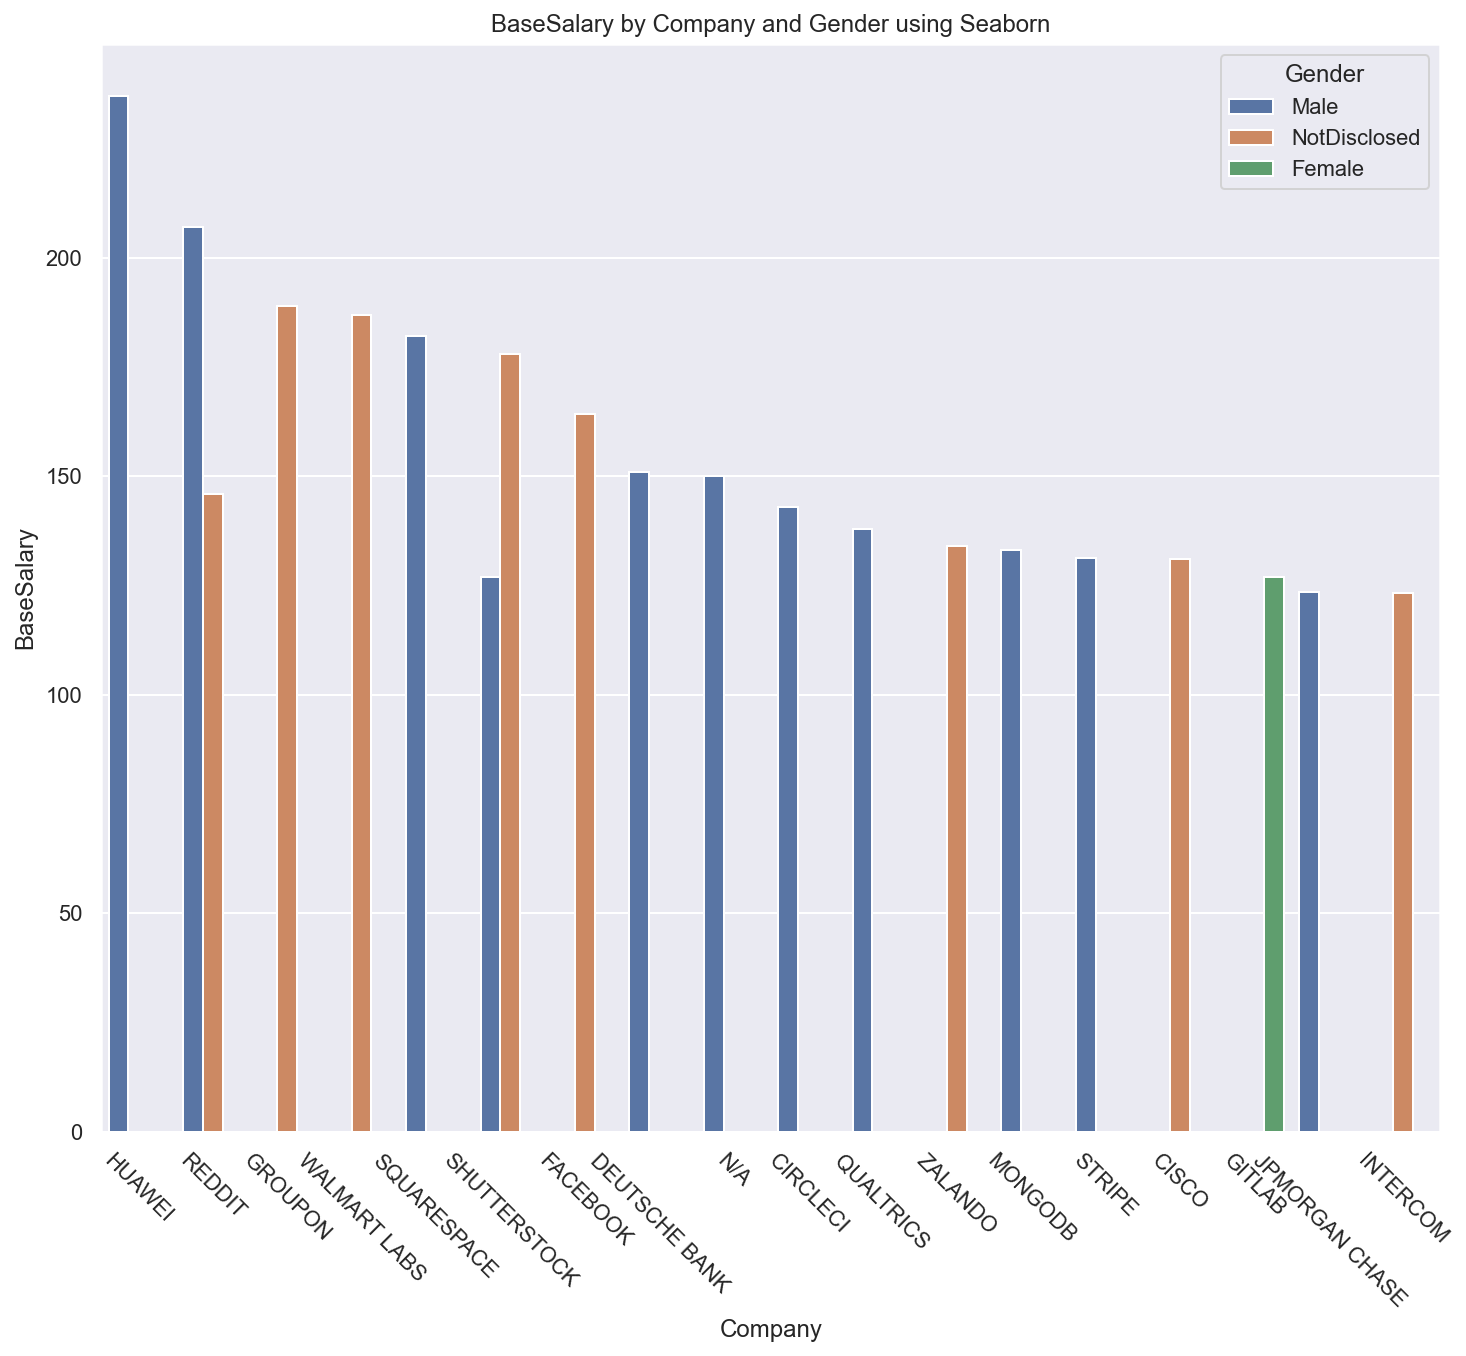

In [53]:
#Visualise TCOMP by Company and Gender using Seaborn
sns.set(rc = {'figure.figsize':(12,10)})

#Visualise TCOMP for top 10 companies
SalaryByGender=CompaniesInIrelanddf_filtered.groupby(['Company','Gender'])['BaseSalary'].mean().reset_index().sort_values('BaseSalary',ascending = False )
SalaryByGenderTop10=SalaryByGender.nlargest(n=20, columns=['BaseSalary'], keep="all")

#SalaryByGenderTop10=SalaryByGender.nlargest(n=10, columns=['TCOMP'], keep="all")
print(SalaryByGenderTop10.head())
plt.xticks(rotation=-45)
plt.title("BaseSalary by Company and Gender using Seaborn")
sns.barplot(data=SalaryByGenderTop10, y='BaseSalary', x='Company', hue='Gender')





(-1.0, 25.0)

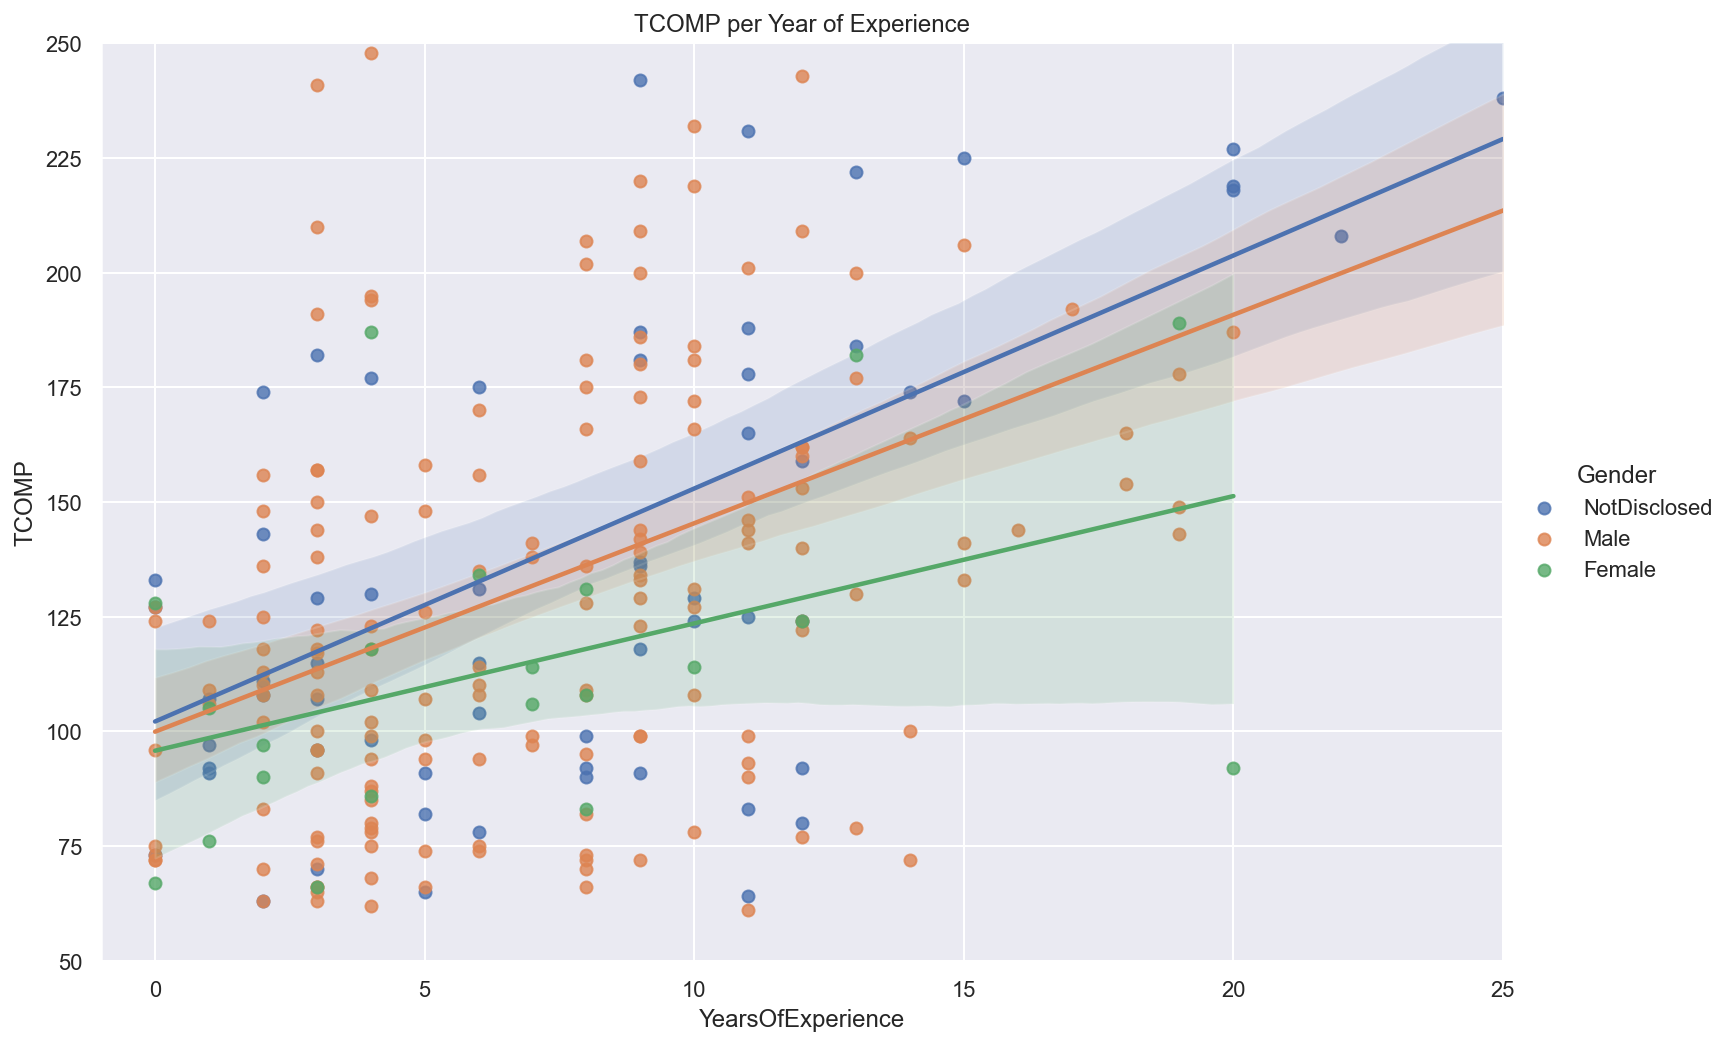

In [54]:
#Create a Scattergraph Years of Experience to Total compensation


# Scatterplot arguments

sns.lmplot(x='YearsOfExperience', y='TCOMP', data=CompaniesInIrelanddf_filtered,
           fit_reg=True, # Add a regression line
           hue='Gender', height=7, aspect=1.5).set(title='TCOMP per Year of Experience')   # Color by gender

plt.ylim(50, 250)
plt.xlim(-1, 25)

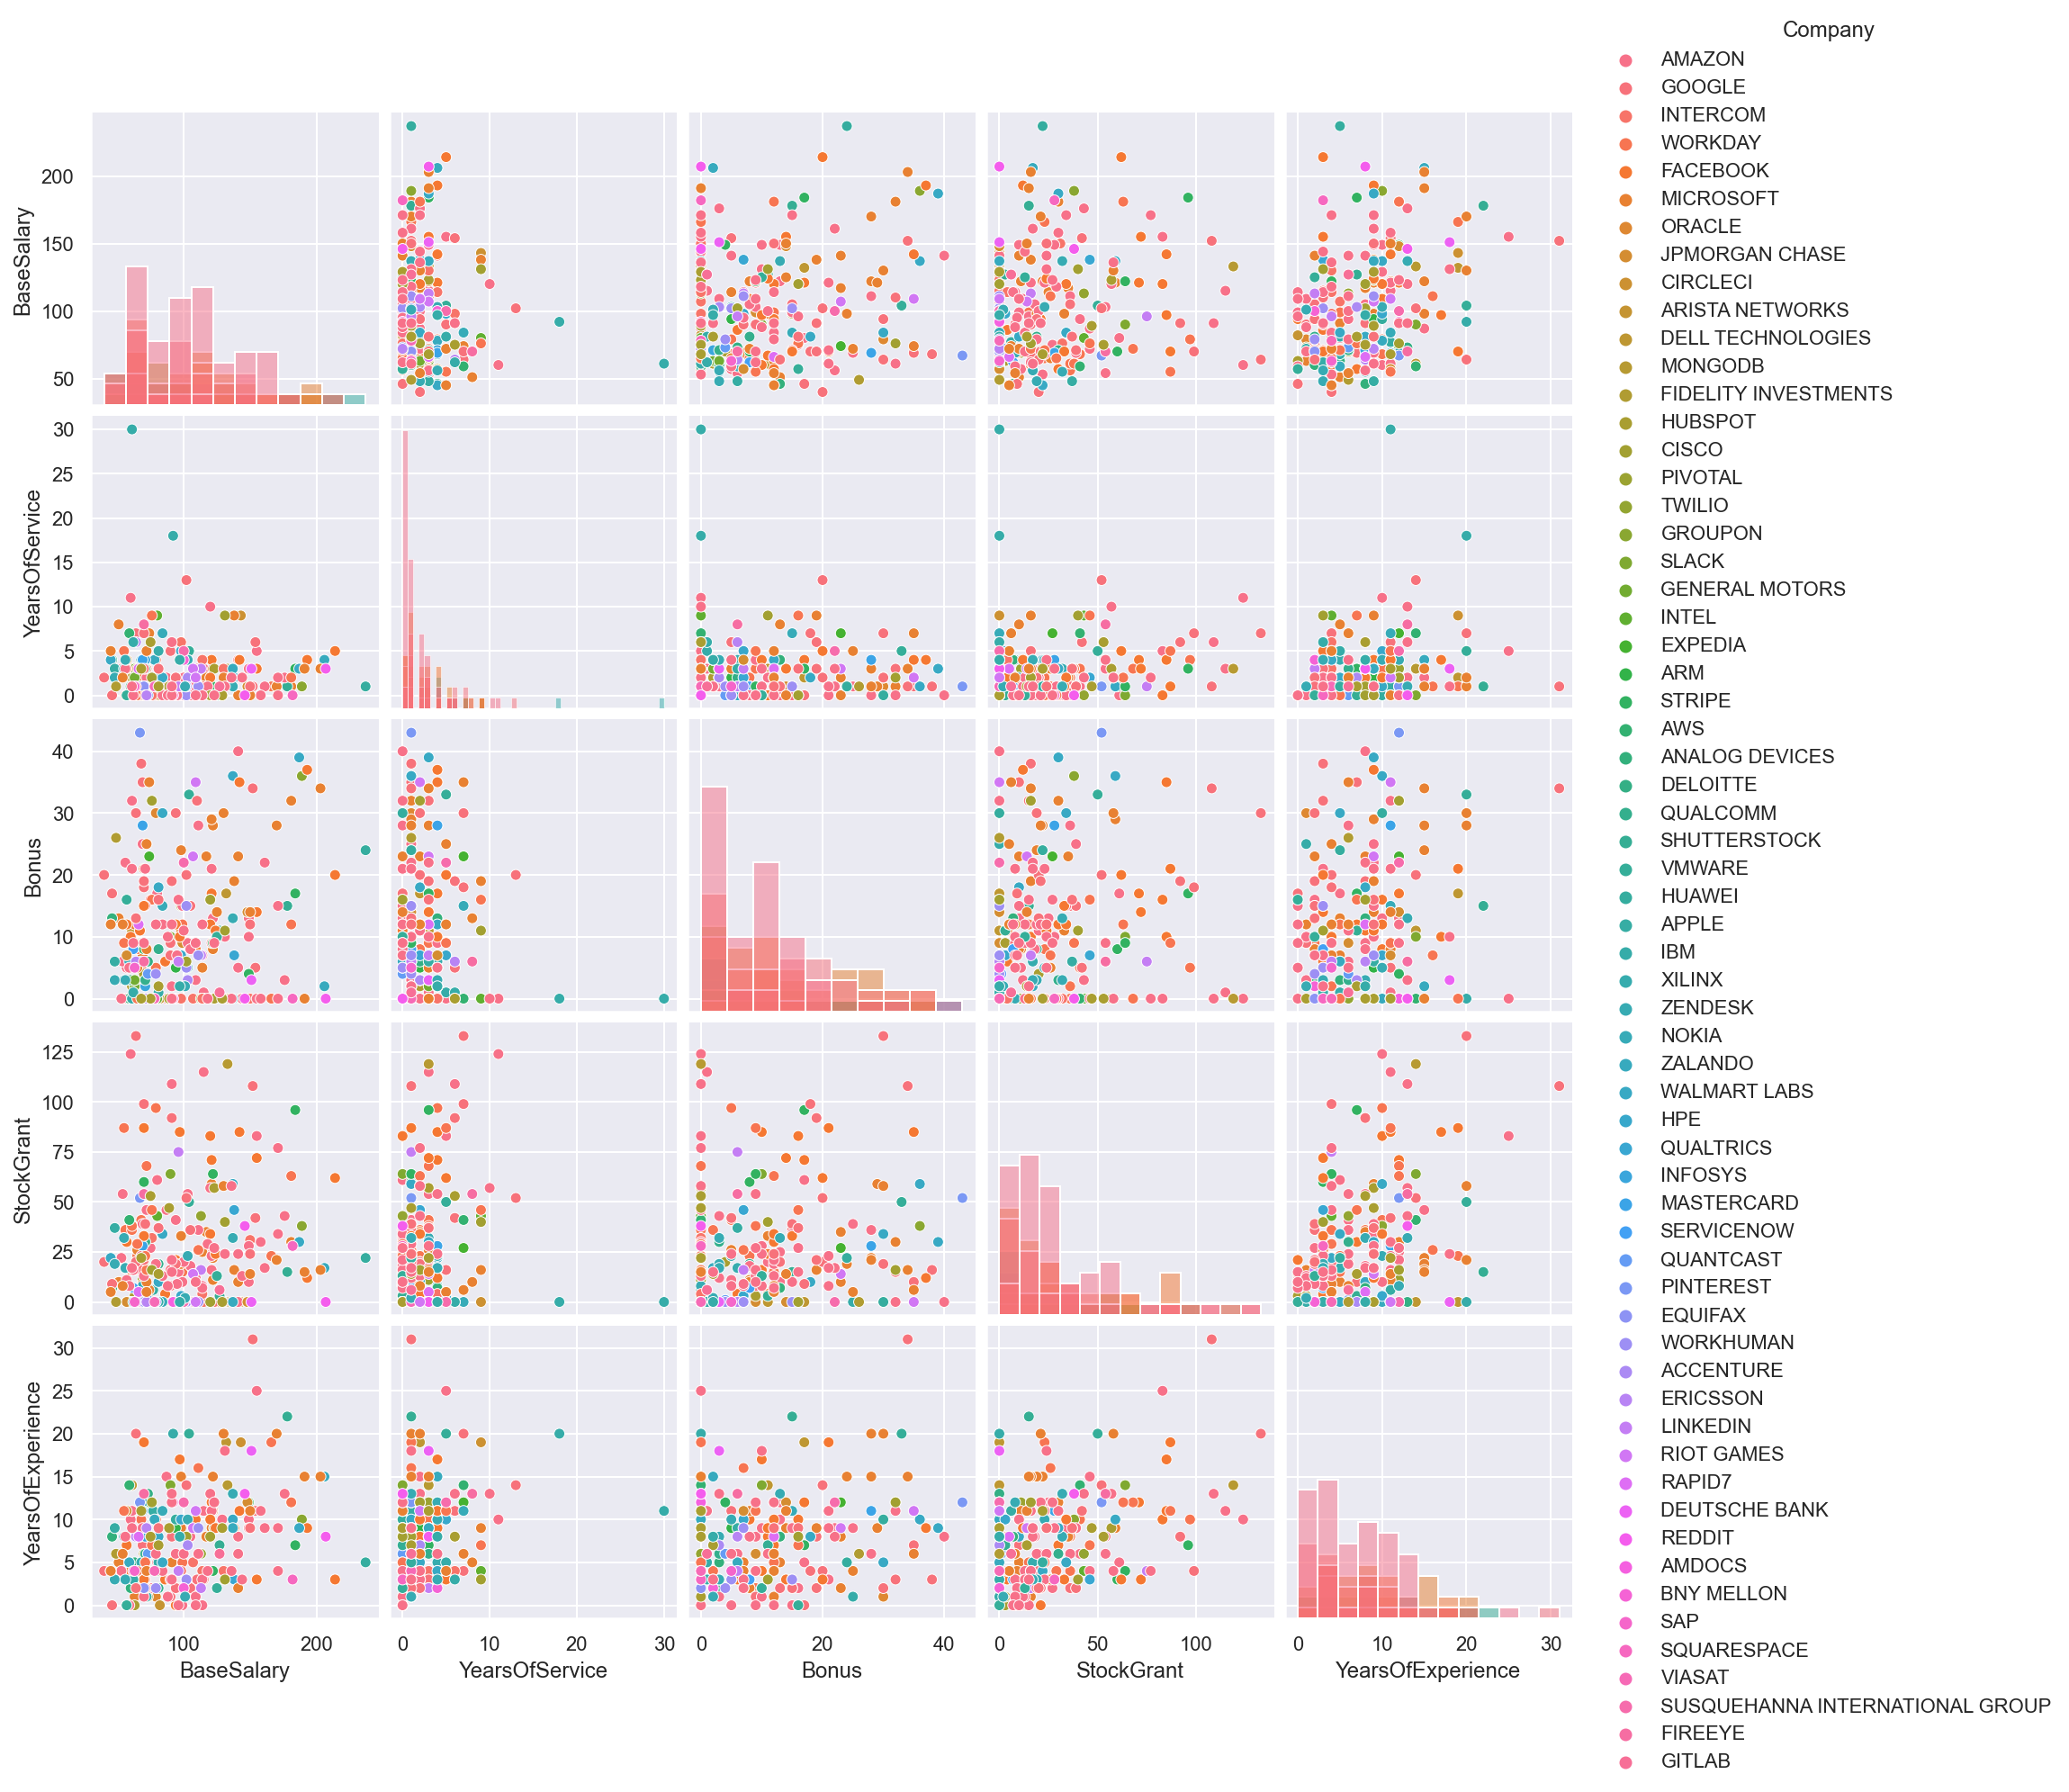

In [55]:
# Suppress warnings
warnings.filterwarnings('ignore')
#sns.pairplot(SalaryPredictionData_filtered, x_vars=['YearsOfExperience','YearsOfService','BaseSalary'], y_vars='TCOMP', size=7, aspect=0.7, kind='reg')
PairPlotdf=CompaniesInIrelanddf_filtered[["Company","BaseSalary","YearsOfService","Bonus","StockGrant","YearsOfExperience"]]
PairPlotdf.to_csv('PairPlot.csv')
data = pd.read_csv("PairPlot.csv")
data.set_index('rowNumber',inplace=True)
#sns.pairplot(data, hue='Company')


#Stock Grant prediction - 30% accurate with 50 50 split
#sns.pairplot(data, x_vars=['YearsOfService','Bonus','StockGrant','YearsOfExperience'], y_vars='TCOMP', size=7, aspect=0.7, kind='reg', hue='Company')
#sns.pairplot(df,hue = ‘smoker’,diag_kind = “kde”,kind = “scatter”,palette = “husl”)
sns.pairplot(data,hue='Company',diag_kind = 'hist',kind ='scatter',palette = 'husl')

# Custom Function to Plot Years of Service versus TCOMP

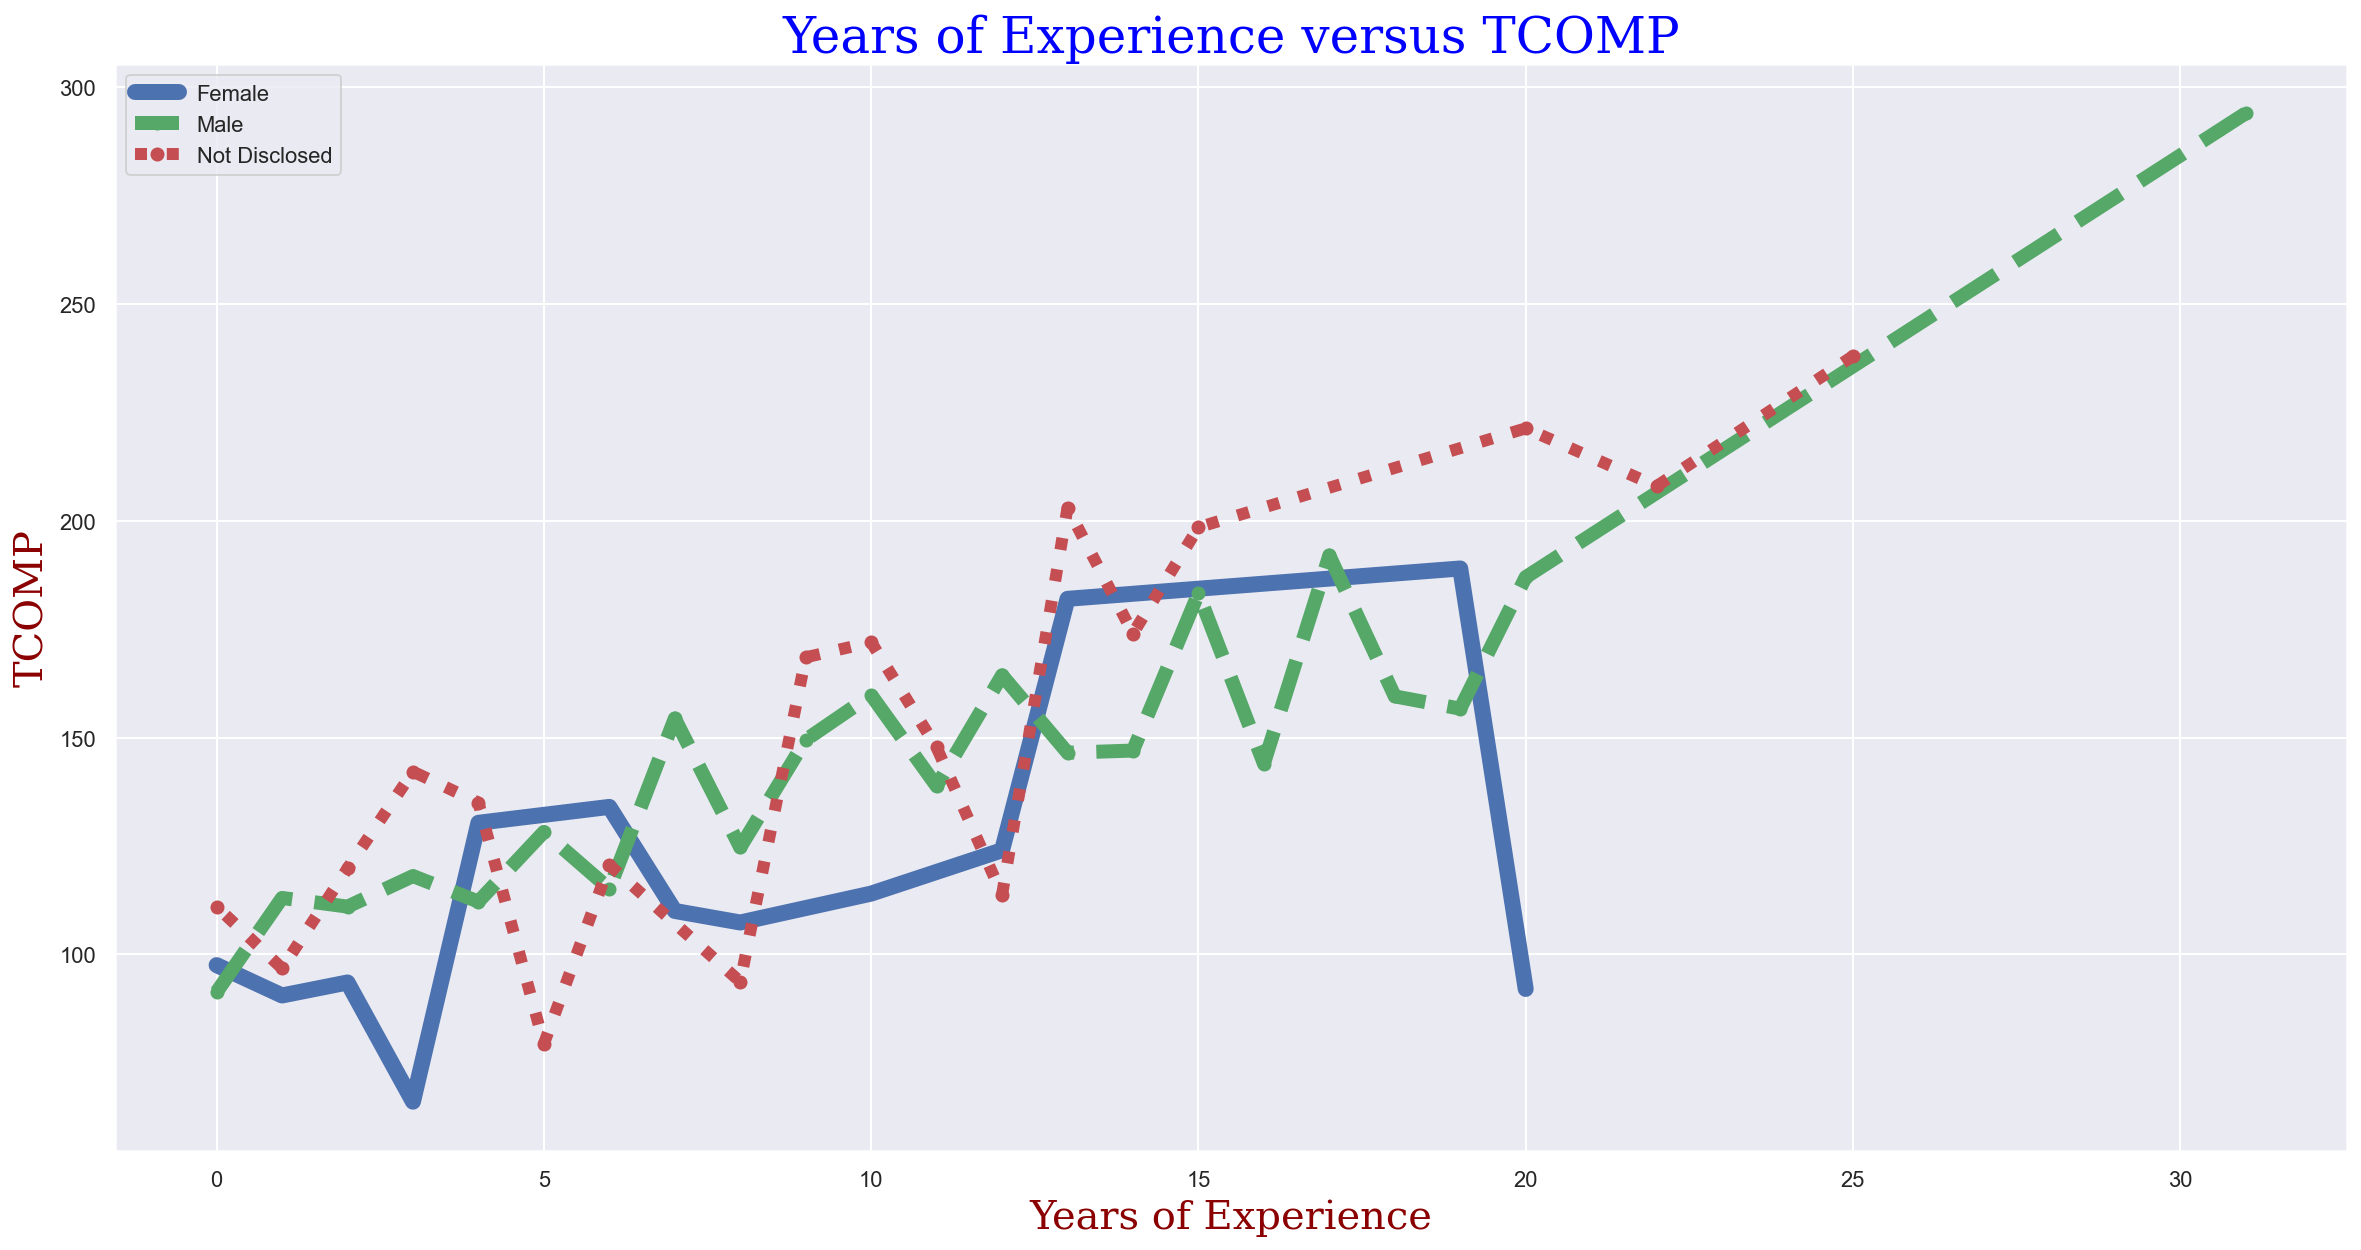

In [56]:
# Define a function called CorinnasPlotFunction - to fulfil scoring criteria

# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [20, 10]
# Set up with a higher resolution screen
#%config InlineBackend.figure_format = 'retina'
#matplotlib.style.use('fivethirtyeight')

#CompaniesInIrelanddf_filtered by Gender
FemaleSalaryIreland=(CompaniesInIrelanddf_filtered['Gender'].str.contains('Female',na=False))
FemaleSalaryIrelanddf=CompaniesInIrelanddf_filtered.loc[FemaleSalaryIreland]
FemaleSalaryIrelanddf=FemaleSalaryIrelanddf.groupby(['YearsOfExperience'])['TCOMP'].mean().reset_index().sort_values('YearsOfExperience',ascending = False )


MaleSalaryIreland=(CompaniesInIrelanddf_filtered['Gender'].str.contains('Male',na=False))
MaleSalaryIrelanddf=CompaniesInIrelanddf_filtered.loc[MaleSalaryIreland]
MaleSalaryIrelanddf=MaleSalaryIrelanddf.groupby(['YearsOfExperience'])['TCOMP'].mean().reset_index().sort_values('YearsOfExperience',ascending = False )


NDSalaryIreland=(CompaniesInIrelanddf_filtered['Gender'].str.contains('NotDisclosed',na=False))
NDSalaryIrelanddf=CompaniesInIrelanddf_filtered.loc[NDSalaryIreland]
NDSalaryIrelanddf=NDSalaryIrelanddf.groupby(['YearsOfExperience'])['TCOMP'].mean().reset_index().sort_values('YearsOfExperience',ascending = False )



def CorinnasPlotFunction(x, y,color,linestyle,linewidth,marker,label):
# Plot the inputs x,y in the provided colour
   ax.plot(x, y, color=color, linestyle=linestyle, linewidth=linewidth, marker=marker, label=label)

fig, ax = plt.subplots()
CorinnasPlotFunction(FemaleSalaryIrelanddf["YearsOfExperience"],FemaleSalaryIrelanddf["TCOMP"], "b","solid","8",'*', "Female")
CorinnasPlotFunction(MaleSalaryIrelanddf["YearsOfExperience"],MaleSalaryIrelanddf["TCOMP"], "g","dashed","7",'o', "Male")
CorinnasPlotFunction(NDSalaryIrelanddf["YearsOfExperience"],NDSalaryIrelanddf["TCOMP"], "r","dotted","6",'o', "Not Disclosed")
ax.set_title("Years of Experience versus TCOMP",fontdict = font1)
ax.set_xlabel("Years of Experience", fontdict = font2)
ax.set_ylabel("TCOMP", fontdict = font2)
ax.legend()
plt.show()


# Stock Data

In [57]:
#Companies located in Ireland are in the InIreland dataframe

# Convert to List
FilteredTitles=InIreland.Title.unique().tolist()

#Filter out undesired titles such as Marketing
Irish_JobTitles_filtered = InIreland[InIreland['Title'].isin(['Software Engineer', 'Solution Architect', 'Business Analyst', 'Technical Program Manager', 'Data Scientist'])]
Irish_JobTitles_filtered.head()
newFilteredTitles=Irish_JobTitles_filtered.Title.unique().tolist()
print(newFilteredTitles)


Irish_StockGrantCompanies_filtered = Irish_JobTitles_filtered[Irish_JobTitles_filtered['StockGrant']>0]
#Irish_StockGrantCompanies_filtered.to_csv("Irish_StockGrantCompanies_filtered1.csv")


newFilteredCompanies=Irish_StockGrantCompanies_filtered.Company.unique().tolist()
print(newFilteredCompanies)

#Drop Companies from the dataframe where unable to find a ticker in yahoo finance'
NewSalarydf = Irish_StockGrantCompanies_filtered[~Irish_StockGrantCompanies_filtered['Company'].isin(['INTERCOM', 'STARTUP', 'SLACK', 'STRIPE', 'AWS', 'WALMART LABS', 'QUANTCAST','LINKEDIN','RIOT GAMES', 'FIREEYE', 'HUAWEI', 'REDDIT'])]

# Stock ticker dictionary
StockTicker = {'AMAZON':'AMZN', 'MICROSOFT':'MSFT','CISCO':'CSCO', 'GOOGLE':'GOOG', 'WORKDAY':'WDAY', 'FACEBOOK':'META','TOAST':'TOST', 'ARISTA NETWORKS':'ANET','MONGODB':'MDB','HUBSPOT':'HUBS','PIVOTAL':'PICC','TWILIO':'TWLO','EXPEDIA':'EXPE','SHUTTERSTOCK':'SSTK','VMWARE':'VMW','TENABLE':'TENB','QUALTRICS':'XM','SERVICENOW':'NOW','RAPID7':'RPD','ZALANDO':'ZLNDY','ZENDESK':'ZEN'}
  
# Mapping the dictionary keys to the data frame.
NewSalarydf['Ticker'] = NewSalarydf['Company'].map(StockTicker)
NewSalarydf.to_csv("NewSalarydf2.csv")


['Software Engineer', 'Solution Architect', 'Technical Program Manager', 'Data Scientist', 'Business Analyst']
['AMAZON', 'GOOGLE', 'INTERCOM', 'WORKDAY', 'MICROSOFT', 'FACEBOOK', 'ARISTA NETWORKS', 'MONGODB', 'HUBSPOT', 'PIVOTAL', 'TWILIO', 'SLACK', 'EXPEDIA', 'STRIPE', 'AWS', 'SHUTTERSTOCK', 'VMWARE', 'WALMART LABS', 'QUALTRICS', 'SERVICENOW', 'QUANTCAST', 'ZALANDO', 'ZENDESK', 'LINKEDIN', 'RIOT GAMES', 'RAPID7', 'CISCO', 'FIREEYE', 'HUAWEI', 'REDDIT']


In [58]:
stock_data=stock_data.transpose()


In [59]:
stock_data.head(50)


Date                2022-11-11
Attributes Symbols            
Adj Close  XM        11.480000
           NOW      409.910004
           RPD       31.379999
           ZLNDY     17.250000
           ZEN       76.699997
           AMZN     100.790001
           CSCO      44.790001
           MSFT     246.415558
           GOOG      96.730003
           META     113.019997
           AAPL     149.699997
           WDAY     156.949997
           GWRE      60.930000
           INTC      30.430000
           ORCL      77.739998
           TOST      20.480000
           ANET     128.550003
           MDB      175.940002
           HUBS     306.089996
           PICC       9.940000
           TWLO      55.270000
           EXPE     102.790001
           SSTK      53.910000
           VMW      115.970001
           TENB      39.750000
Close      XM        11.480000
           NOW      409.910004
           RPD       31.379999
           ZLNDY     17.250000
           ZEN       76.699997
           AMZN     100.790001
           CSCO      44.790001
           MSFT     247.110001
           GOOG      96.730003
           META     113.019997
           AAPL     149.699997
           WDAY     156.949997
           GWRE      60.930000
           INTC      30.430000
           ORCL      77.739998
           TOST      20.480000
           ANET     128.550003
           MDB      175.940002
           HUBS     306.089996
           PICC       9.940000
           TWLO      55.270000
           EXPE     102.790001
           SSTK      53.910000
           VMW      115.970001
           TENB      39.750000

In [60]:
stock_data.to_csv("TransposedStock.csv", index='False')
stock_data = pd.read_csv('TransposedStock.csv')
stock_data = stock_data[stock_data['Attributes'].isin(['Open'])]

stock_data.head()

,Attributes,Symbols,2022-11-11
100,Open,XM,11.240000
101,Open,NOW,406.989990
102,Open,RPD,29.990000
103,Open,ZLNDY,16.190300
104,Open,ZEN,76.629997


In [61]:
stock_data.reset_index()
stock_data.columns = ["Attributes","Ticker","OpeningPrice"]
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 100 to 124
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Attributes    25 non-null     object 
 1   Ticker        25 non-null     object 
 2   OpeningPrice  25 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [62]:
stock_data.head()

,Attributes,Ticker,OpeningPrice
100,Open,XM,11.240000
101,Open,NOW,406.989990
102,Open,RPD,29.990000
103,Open,ZLNDY,16.190300
104,Open,ZEN,76.629997


# Merge Salary Dataframe and StockPrice Dataframe

To demonstrate merging dataframes - I am going to merge in the opening stock price and stock ticker symbol for each company to my salary dataframe.

In [63]:
#Test Merge
MergeCompanyStockdf = pd.merge(NewSalarydf,
                 stock_data[['Ticker', 'OpeningPrice']],
                 on='Ticker')

MergeCompanyStockdf.head()


,Date,Company,Level,Title,TCOMP,Location,YearsOfExperience,YearsOfService,Tag,BaseSalary,StockGrant,Bonus,Gender,CityId,Ticker,OpeningPrice
0,2017-08-13,AMAZON,L5,Software Engineer,231.0,"Dublin, DN, Ireland",11,3,NotDisclosed,115.0,115.0,1.0,NotDisclosed,4015,AMZN,97.879997
1,2018-06-12,AMAZON,L5,Software Engineer,133.0,"Dublin, DN, Ireland",15,2,Full Stack,87.0,46.0,0.0,Male,4015,AMZN,97.879997
2,2018-10-31,AMAZON,6,Software Engineer,238.0,"Dublin, DN, Ireland",25,5,Distributed Systems (Back-End),155.0,83.0,0.0,NotDisclosed,4015,AMZN,97.879997
3,2019-03-02,AMAZON,L5,Software Engineer,160.0,"Dublin, DN, Ireland",12,1,Web Development (Front-End),122.0,25.0,13.0,Male,4015,AMZN,97.879997
4,2019-07-16,AMAZON,L4,Software Engineer,158.0,"Dublin, DN, Ireland",5,0,Distributed Systems (Back-End),80.0,61.0,17.0,Male,4015,AMZN,97.879997


In [64]:
MergeCompanyStockdf.to_csv("MergeCompanyStock.csv")

# Insights


Data was filtered to the following companies in Ireland: 
    
    AMAZON   GOOGLE   INTERCOM   WORKDAY   FACEBOOK   MICROSOFT   ORACLE  JPMORGAN CHASE   CIRCLECI   ARISTA NETWORKS   DELL TECHNOLOGIES  MONGODB   FIDELITY INVESTMENTS   HUBSPOT   CISCO   PIVOTAL   TWILIO ,  GROUPON   SLACK   GENERAL MOTORS   INTEL   EXPEDIA   ARM   STRIPE   AWS ,  ANALOG DEVICES   DELOITTE   QUALCOMM   N/A   SHUTTERSTOCK   VMWARE  HUAWEI   APPLE   IBM   XILINX   ZENDESK   NOKIA   ZALANDO   WALMART LABS   HPE   QUALTRICS   INFOSYS   MASTERCARD   SERVICENOW  QUANTCAST   PINTEREST   EQUIFAX   WORKHUMAN   ACCENTURE   ERICSSON  LINKEDIN   RIOT GAMES   RAPID7   DEUTSCHE BANK   REDDIT   AMDOCS    BNY MELLON   SAP   SQUARESPACE   VIASAT  SUSQUEHANNA INTERNATIONAL GROUP   FIREEYE   GITLAB 


Mean Years of Service: 2.5 years
    
Mean Years of Experience: 6.5 years

The top company in Ireland at retaining staff is IBM with an average years of service at 10.7 years, followed by Intel and Circleci at 9 years.

The top company in Ireland for average TCOMP was GROUPON with an average base salary of 189k , stock grant of 38k and a total compensation package of 263k

The top Company in Ireland for average StockGrant was MONGODB at 119k

The highest paid indiviual (Base Salary) worked on Distributed Systems for HUAWEI. They had one year of service and 5 years of experience.

The best paying job titles were: 
Software developer at 191k
python, spark, hadoop   at 151k
Cloud Computing at 141.0
Enterprise at 138.0

The top company in Ireland for average stock grant is MONGODB at 119k, followed by SLACK at 64k and STRIPE at 55k

Where gender is disclosed - Females earn a lower TCOMP than males.

# Perform Machine Learning 

I am going to use Multiple Linear regression Modelling to try and predict the stock grant based of Years of Experience, Years of Service, Base Salary and TCOMP. 

In [65]:
#Import the data
SalaryPredictionData = pd.read_csv('MergeCompanyStock.csv', index_col=0)
print(SalaryPredictionData.describe())
SalaryPredictionData.head()

            TCOMP  YearsOfExperience  YearsOfService  BaseSalary  StockGrant  \
count  139.000000         139.000000      139.000000  139.000000  139.000000   
mean   140.949640           7.057554        2.100719   99.417266   31.309353   
std     49.433504           5.198620        2.426589   37.493168   26.253184   
min     62.000000           0.000000        0.000000   45.000000    2.000000   
25%     99.000000           3.000000        0.000000   69.500000   14.000000   
50%    133.000000           6.000000        1.000000   94.000000   23.000000   
75%    174.000000          11.000000        3.000000  121.000000   40.500000   
max    296.000000          25.000000       13.000000  214.000000  133.000000   

            Bonus        CityId  OpeningPrice  
count  139.000000    139.000000    139.000000  
mean    10.223022   4373.388489    133.647664  
std      8.731953   2976.556452     72.559132  
min      0.000000   4015.000000      9.945000  
25%      3.000000   4015.000000     97.

,Date,Company,Level,Title,TCOMP,Location,YearsOfExperience,YearsOfService,Tag,BaseSalary,StockGrant,Bonus,Gender,CityId,Ticker,OpeningPrice
0,2017-08-13,AMAZON,L5,Software Engineer,231.0,"Dublin, DN, Ireland",11,3,NotDisclosed,115.0,115.0,1.0,NotDisclosed,4015,AMZN,97.879997
1,2018-06-12,AMAZON,L5,Software Engineer,133.0,"Dublin, DN, Ireland",15,2,Full Stack,87.0,46.0,0.0,Male,4015,AMZN,97.879997
2,2018-10-31,AMAZON,6,Software Engineer,238.0,"Dublin, DN, Ireland",25,5,Distributed Systems (Back-End),155.0,83.0,0.0,NotDisclosed,4015,AMZN,97.879997
3,2019-03-02,AMAZON,L5,Software Engineer,160.0,"Dublin, DN, Ireland",12,1,Web Development (Front-End),122.0,25.0,13.0,Male,4015,AMZN,97.879997
4,2019-07-16,AMAZON,L4,Software Engineer,158.0,"Dublin, DN, Ireland",5,0,Distributed Systems (Back-End),80.0,61.0,17.0,Male,4015,AMZN,97.879997


In [66]:
# Drop unwanted columns
SalaryPredictionData.drop(columns=['Date','Location','CityId','Ticker','OpeningPrice'], inplace=True)
SalaryPredictionData.head()

,Company,Level,Title,TCOMP,YearsOfExperience,YearsOfService,Tag,BaseSalary,StockGrant,Bonus,Gender
0,AMAZON,L5,Software Engineer,231.0,11,3,NotDisclosed,115.0,115.0,1.0,NotDisclosed
1,AMAZON,L5,Software Engineer,133.0,15,2,Full Stack,87.0,46.0,0.0,Male
2,AMAZON,6,Software Engineer,238.0,25,5,Distributed Systems (Back-End),155.0,83.0,0.0,NotDisclosed
3,AMAZON,L5,Software Engineer,160.0,12,1,Web Development (Front-End),122.0,25.0,13.0,Male
4,AMAZON,L4,Software Engineer,158.0,5,0,Distributed Systems (Back-End),80.0,61.0,17.0,Male


In [67]:
#Check for nulls
print("Check for nulls: ")
print(SalaryPredictionData.isnull().sum())

#Check for duplicates
print('Checking for duplicate rows: ')
print(SalaryPredictionData.duplicated().sum(), ' duplicate row(s) present.')


Check for nulls: 
Company              0
Level                0
Title                0
TCOMP                0
YearsOfExperience    0
YearsOfService       0
Tag                  0
BaseSalary           0
StockGrant           0
Bonus                0
Gender               0
dtype: int64
Checking for duplicate rows: 
0  duplicate row(s) present.


In [68]:
SalaryPredictionData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 138
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            139 non-null    object 
 1   Level              139 non-null    object 
 2   Title              139 non-null    object 
 3   TCOMP              139 non-null    float64
 4   YearsOfExperience  139 non-null    int64  
 5   YearsOfService     139 non-null    int64  
 6   Tag                139 non-null    object 
 7   BaseSalary         139 non-null    float64
 8   StockGrant         139 non-null    float64
 9   Bonus              139 non-null    float64
 10  Gender             139 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 13.0+ KB


In [69]:
SalaryPredictionData.describe()

,TCOMP,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,140.949640,7.057554,2.100719,99.417266,31.309353,10.223022
std,49.433504,5.198620,2.426589,37.493168,26.253184,8.731953
min,62.000000,0.000000,0.000000,45.000000,2.000000,0.000000
25%,99.000000,3.000000,0.000000,69.500000,14.000000,3.000000
50%,133.000000,6.000000,1.000000,94.000000,23.000000,9.000000
75%,174.000000,11.000000,3.000000,121.000000,40.500000,15.000000
max,296.000000,25.000000,13.000000,214.000000,133.000000,35.000000


In [70]:
#Filter outliers - filter top and bottom 5% 
SalaryPredictionData_filtered = SalaryPredictionData[SalaryPredictionData['BaseSalary'].between(df['BaseSalary'].quantile(.05),df['BaseSalary'].quantile(.95))]
SalaryPredictionData_filtered = SalaryPredictionData[SalaryPredictionData['TCOMP'].between(df['TCOMP'].quantile(.05),df['TCOMP'].quantile(.95))]
SalaryPredictionData_filtered = SalaryPredictionData[SalaryPredictionData['StockGrant'].between(df['StockGrant'].quantile(.05),df['StockGrant'].quantile(.95))]
SalaryPredictionData_filtered = SalaryPredictionData[SalaryPredictionData['Bonus'].between(df['Bonus'].quantile(.05),df['Bonus'].quantile(.95))]


In [71]:
SalaryPredictionData_filtered.head()

,Company,Level,Title,TCOMP,YearsOfExperience,YearsOfService,Tag,BaseSalary,StockGrant,Bonus,Gender
0,AMAZON,L5,Software Engineer,231.0,11,3,NotDisclosed,115.0,115.0,1.0,NotDisclosed
1,AMAZON,L5,Software Engineer,133.0,15,2,Full Stack,87.0,46.0,0.0,Male
2,AMAZON,6,Software Engineer,238.0,25,5,Distributed Systems (Back-End),155.0,83.0,0.0,NotDisclosed
3,AMAZON,L5,Software Engineer,160.0,12,1,Web Development (Front-End),122.0,25.0,13.0,Male
4,AMAZON,L4,Software Engineer,158.0,5,0,Distributed Systems (Back-End),80.0,61.0,17.0,Male


In [72]:
SalaryPredictionData_filtered.describe()

,TCOMP,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,140.949640,7.057554,2.100719,99.417266,31.309353,10.223022
std,49.433504,5.198620,2.426589,37.493168,26.253184,8.731953
min,62.000000,0.000000,0.000000,45.000000,2.000000,0.000000
25%,99.000000,3.000000,0.000000,69.500000,14.000000,3.000000
50%,133.000000,6.000000,1.000000,94.000000,23.000000,9.000000
75%,174.000000,11.000000,3.000000,121.000000,40.500000,15.000000
max,296.000000,25.000000,13.000000,214.000000,133.000000,35.000000


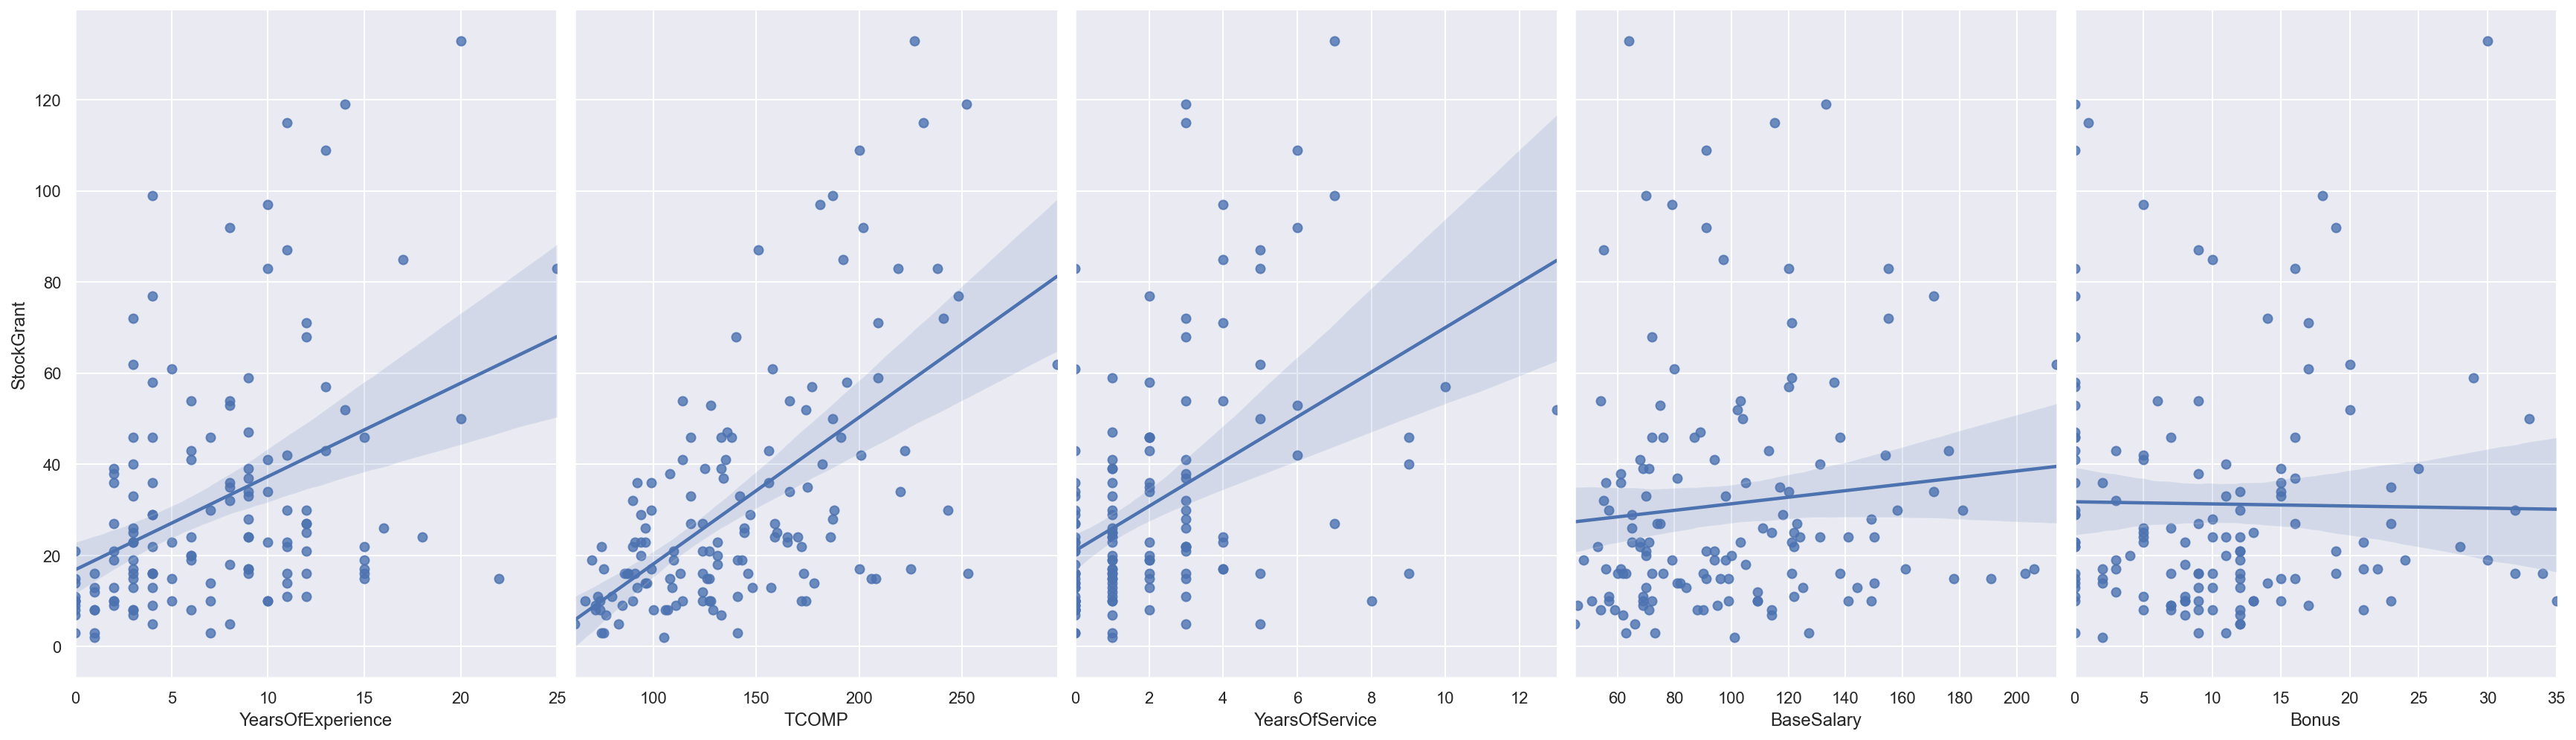

In [73]:

#Stock Grant prediction 
sns.pairplot(SalaryPredictionData_filtered, x_vars=['YearsOfExperience','TCOMP','YearsOfService','BaseSalary','Bonus'], y_vars='StockGrant', size=7, aspect=0.7, kind='reg')



# Test 1:  Years of Experience, Years of Service, Base Salary, Bonus, TCOMP to StockGrant

In [74]:
#Stock Grant
#Extract the features into X
#Input Features - Years of Experience, Years of Service, Base Salary, Bonus, Stock Grant
feature_cols = ['YearsOfExperience','YearsOfService','BaseSalary','Bonus','TCOMP']
x=SalaryPredictionData_filtered[feature_cols].values
print(x)

[[ 11.   3. 115.   1. 231.]
 [ 15.   2.  87.   0. 133.]
 [ 25.   5. 155.   0. 238.]
 [ 12.   1. 122.  13. 160.]
 [  5.   0.  80.  17. 158.]
 [  6.   1.  94.   0. 135.]
 [  3.   0.  71.  21. 100.]
 [  0.   0.  57.   0.  67.]
 [ 13.  10. 120.   0. 177.]
 [ 10.   0. 149.  13. 172.]
 [  2.   0.  75.  16. 118.]
 [  0.   0.  57.   5.  73.]
 [ 11.   1. 121.   9. 146.]
 [  6.   3.  54.   6. 114.]
 [  0.   0.  99.  15. 124.]
 [  0.   0.  96.  16. 127.]
 [  9.   1. 161.  22. 200.]
 [  4.   2.  72.   0. 118.]
 [  1.   1.  70.   9.  92.]
 [  4.   0.  84.  12. 109.]
 [  8.   4. 103.   9. 166.]
 [ 13.   2. 176.   3. 222.]
 [  4.   3.  53.   0.  75.]
 [ 11.   0. 158.   0. 188.]
 [  8.   0. 105.   8. 131.]
 [  9.   1.  69.  25. 133.]
 [  1.   1. 109.   3. 124.]
 [  3.   1.  68.   0.  91.]
 [  9.   0. 171.  15. 220.]
 [ 11.   0. 121.  21. 165.]
 [  0.   0.  59.   5.  72.]
 [  6.   2. 100.  11. 131.]
 [  9.   3. 149.  10. 187.]
 [  3.   0. 114.   7. 129.]
 [  2.   0.  95.   7. 111.]
 [  4.   1. 118.   0

In [75]:
#StockGrant Prediction
#Extract and examine the output variable y
y = SalaryPredictionData_filtered['StockGrant'].values
print(y)


[115.  46.  83.  25.  61.  41.   8.  10.  57.  10.  27.  11.  16.  54.
  10.  15.  17.  46.  13.  13.  54.  43.  22.  30.  18.  39.  12.  23.
  34.  23.   8.  20.  28.   8.   9.  29.  13.  19.  24.  24.   8.  16.
  21.  77.  58.   7. 109.  10.  15.  27.  17. 133.  10.  42.  92.  16.
   8.  99.  36.   9.  21.  39.  37.  19.  52.  24.  36.  41.  36.  38.
  68.  23.  97.  15.  26.  16.  46.  29.  23.  87.  33.  22.  25.  30.
  16.  16.  10.   9.  59.  35.  11.  10.  26.  10.  19.   5.  16.  14.
   8.  15.  71.  83.  10.  72.  21.  30.  16.  85.  33.  62.  34.  24.
  14. 119.  20.   3.   3.  47.  53.  14.  22.  11.  43.  27.  15.   3.
  50.  13.  46.   7.  17.  32.  23.  19.  17.   2.   5.  16.  40.]


In [76]:
#Split the dataset into a training set and testing set 
#Split dataset 80/20, random state 0 so results will remain the same on each run
#x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#Scale the data
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
#print(x_train)
print('x_trianing dataset shape',x_train.shape)
print('x_testing dataset shape', x_test.shape)
print('y_training dataset shape',y_train.shape)
print('y_testing dataset shape',y_test.shape)

x_trianing dataset shape (111, 5)
x_testing dataset shape (28, 5)
y_training dataset shape (111,)
y_testing dataset shape (28,)


In [77]:
#Train the model -Perform Linear Regression on the training set
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [78]:
print(ml.intercept_)

29.810810810810818


In [79]:
print(ml.coef_)

[-1.75684704e-15  8.65276371e-16 -3.65577083e+01 -8.46443262e+00
  4.52210723e+01]


In [80]:
#Predicting the test set results to see if they are accurate
y_pred = ml.predict(x_test)
#Display the predicted results
print(y_pred)  

[ 57.  11.  22.  62.  23.  83.  21.  16. 119.  11.  12.  35.  18.  34.
  10.   9.   2. 133.  14.  16.   8.  22.  83.  53.  37.  13.  27.  92.]


In [81]:
#Stock Grant Prediction
#Manually evalutate the model
#Check the predicted values of our first row of xdata from the head() 
print(SalaryPredictionData_filtered.head())

# My x values are:11,3,115,115,1
# My predicted StockGrant should be 115

predictedStockGrant=ml.predict([[25,5,155,0,238]])

# My predicted StockGrant should be 115

print('Predicted value for StockGrant: ', predictedStockGrant)

  Company Level              Title  TCOMP  YearsOfExperience  YearsOfService  \
0  AMAZON    L5  Software Engineer  231.0                 11               3   
1  AMAZON    L5  Software Engineer  133.0                 15               2   
2  AMAZON     6  Software Engineer  238.0                 25               5   
3  AMAZON    L5  Software Engineer  160.0                 12               1   
4  AMAZON    L4  Software Engineer  158.0                  5               0   

                              Tag  BaseSalary  StockGrant  Bonus        Gender  
0                    NotDisclosed       115.0       115.0    1.0  NotDisclosed  
1                      Full Stack        87.0        46.0    0.0          Male  
2  Distributed Systems (Back-End)       155.0        83.0    0.0  NotDisclosed  
3     Web Development (Front-End)       122.0        25.0   13.0          Male  
4  Distributed Systems (Back-End)        80.0        61.0   17.0          Male  
Predicted value for StockGrant:  

In [82]:
# Evaluate the model through r2_score
print("r2_score evaluates this model at ",r2_score(y_test, y_pred)*100,"%")

#100%

r2_score evaluates this model at  100.0 %


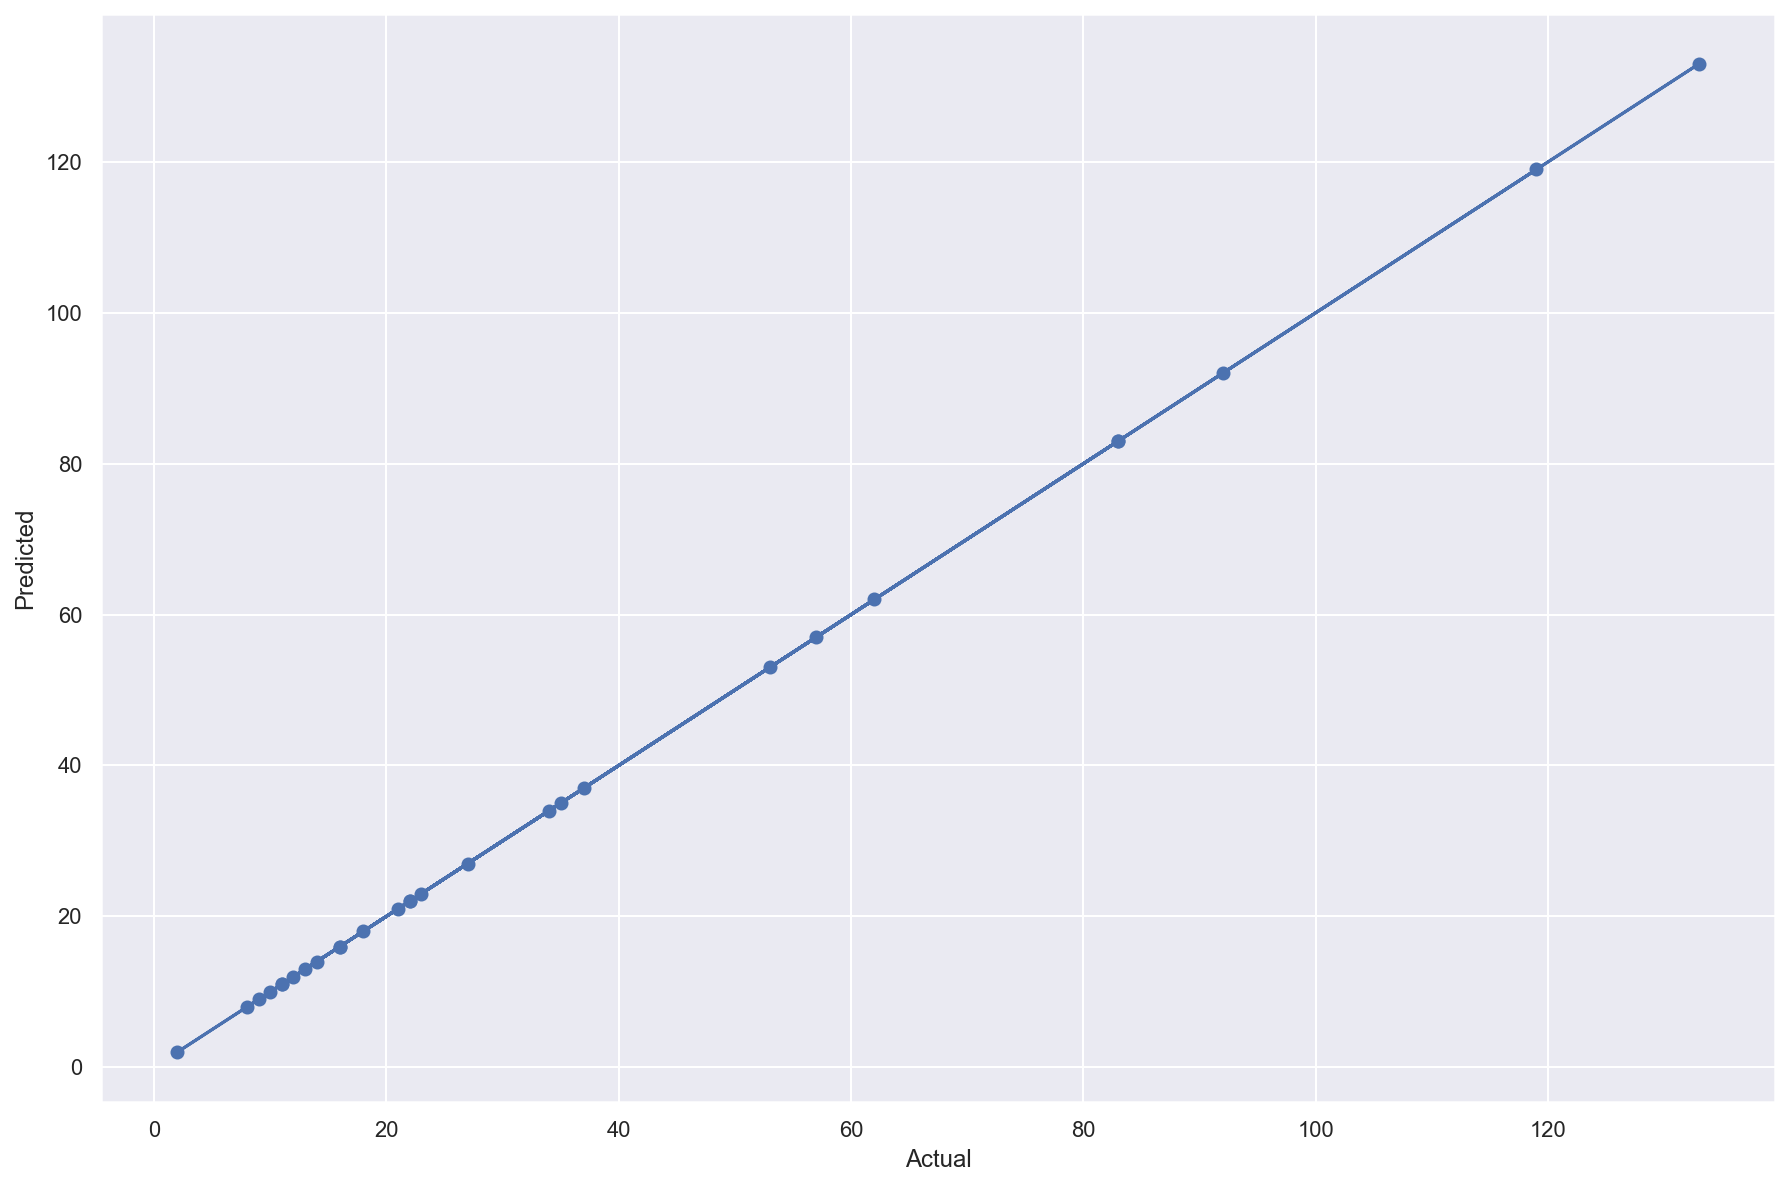

In [83]:
#Create a scatterplot of the real test values versus the predicted values.
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test,y_pred, 1)

#add linear regression line to scatterplot 
plt.plot(y_test, m*y_test+b)

In [84]:
#Print the Actual versus the predicted
pred_y_df=pd.DataFrame({'Actual Value': y_test,'Predicted Value':y_pred, 'Difference': y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
0,57.0,57.0,2.842171e-14
1,11.0,11.0,2.131628e-14
2,22.0,22.0,-3.552714e-15
3,62.0,62.0,8.526513e-14
4,23.0,23.0,-1.065814e-14
5,83.0,83.0,1.421085e-14
6,21.0,21.0,-3.907985e-14
7,16.0,16.0,4.618528e-14
8,119.0,119.0,4.263256e-14
9,11.0,11.0,-1.065814e-14


With my accuracy coming out at 100% - I then realised that the TCOMP column must have been a derived column from BaseSalary, StockGrant and Bonus. My assumption prior to commencing was that TCOMP incorporated other variables such as Car allowances, medical insurance etc.  
I then tried a different test - Could I predict the StockGrant from the baseSalary and Years of Experience?

# Test 2  Predicting StockGrant from Years of Experience, Years of Service and Base Salary

r2 score:  31.175444640539883 %


,Actual Value,Predicted Value,Difference
0,57.0,59.727493,-2.727493
1,11.0,29.176408,-18.176408
2,22.0,38.773835,-16.773835
3,62.0,27.543842,34.456158
4,23.0,23.924329,-0.924329
5,83.0,25.085561,57.914439
6,21.0,29.017401,-8.017401
7,16.0,34.777289,-18.777289
8,119.0,37.999284,81.000716
9,11.0,39.782936,-28.782936


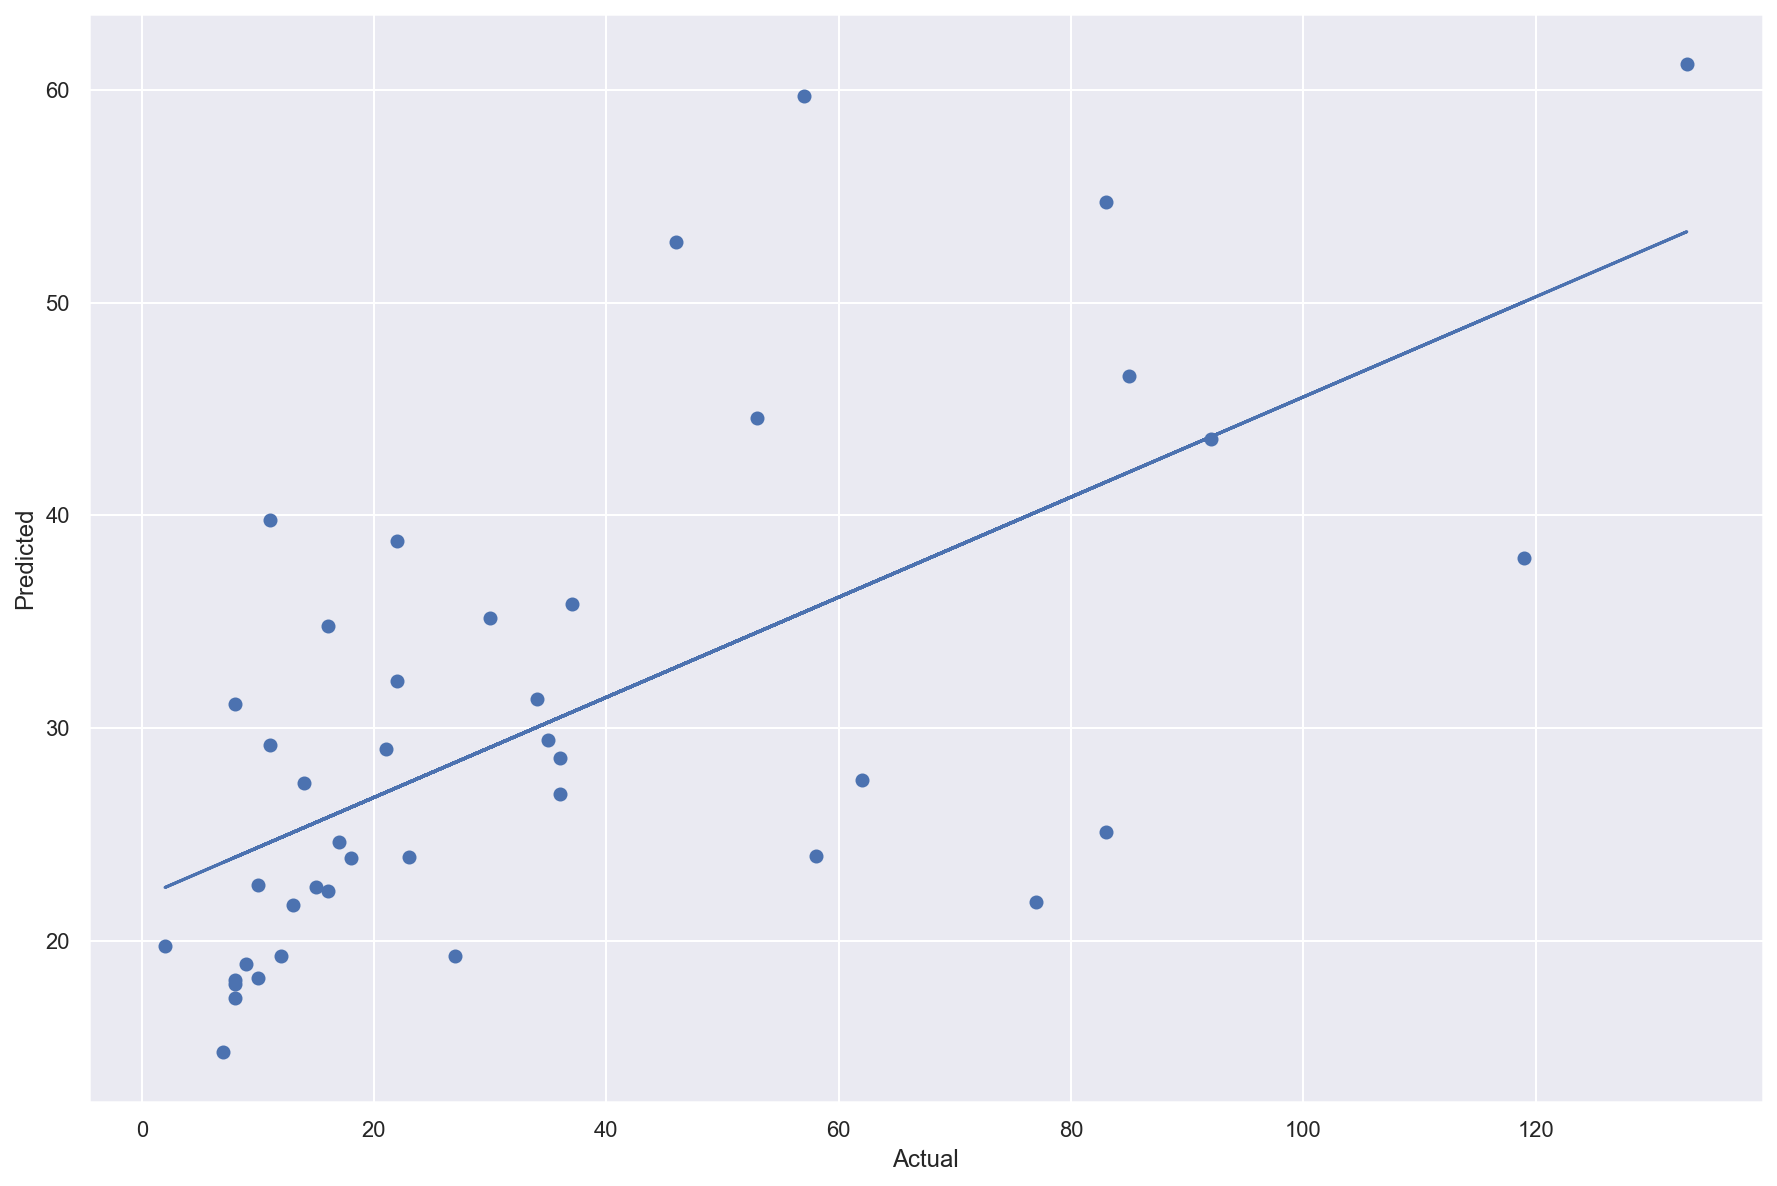

In [85]:

#Stock Grant
#Extract the features into X
#Input Features - Years of Experience, Years of Service, Base Salary, Bonus, Stock Grant

feature_cols = ['YearsOfExperience','BaseSalary','YearsOfService']
X=SalaryPredictionData_filtered[feature_cols].values

#StockGrant Prediction
#Extract and examine the output variable y
y = SalaryPredictionData_filtered['StockGrant'].values


#Split the dataset into a training set and testing set 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#Train the model -Perform Linear Regression on the training set
ml = LinearRegression()
ml.fit(X_train, y_train)

#Predicting the test set results to see if they are accurate
y_pred = ml.predict(X_test)

print("r2 score: ",r2_score(y_test, y_pred)*100,'%')


#Create a scatterplot of the real test values versus the predicted values.
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test,y_pred, 1)

#add linear regression line to scatterplot 
plt.plot(y_test, m*y_test+b)

#Print the Actual versus the predicted
pred_y_df=pd.DataFrame({'Actual Value': y_test,'Predicted Value':y_pred, 'Difference': y_test-y_pred})
pred_y_df[0:20]

# Test 3 Predict the Stock Grant based on Years of Experience, Years of Service for an Individual Company in a defined location


For this test - I re-imported my cleaned Levels.yi dataset.  I further filtered my dataframe down to the company 'Amazon' in the city 'Seattle' and limited my job title to 'Software Engineer'



Accuracy Percentage:  37.63650447148474 %


,Actual Value,Predicted Value,Difference
0,14.0,27.717556,-13.717556
1,26.0,39.118552,-13.118552
2,98.0,30.645187,67.354813
3,27.0,29.513882,-2.513882
4,18.0,23.467377,-5.467377
5,55.0,68.152843,-13.152843
6,90.0,79.284330,10.715670
7,12.0,47.937311,-35.937311
8,95.0,44.236174,50.763826
9,13.0,31.783558,-18.783558


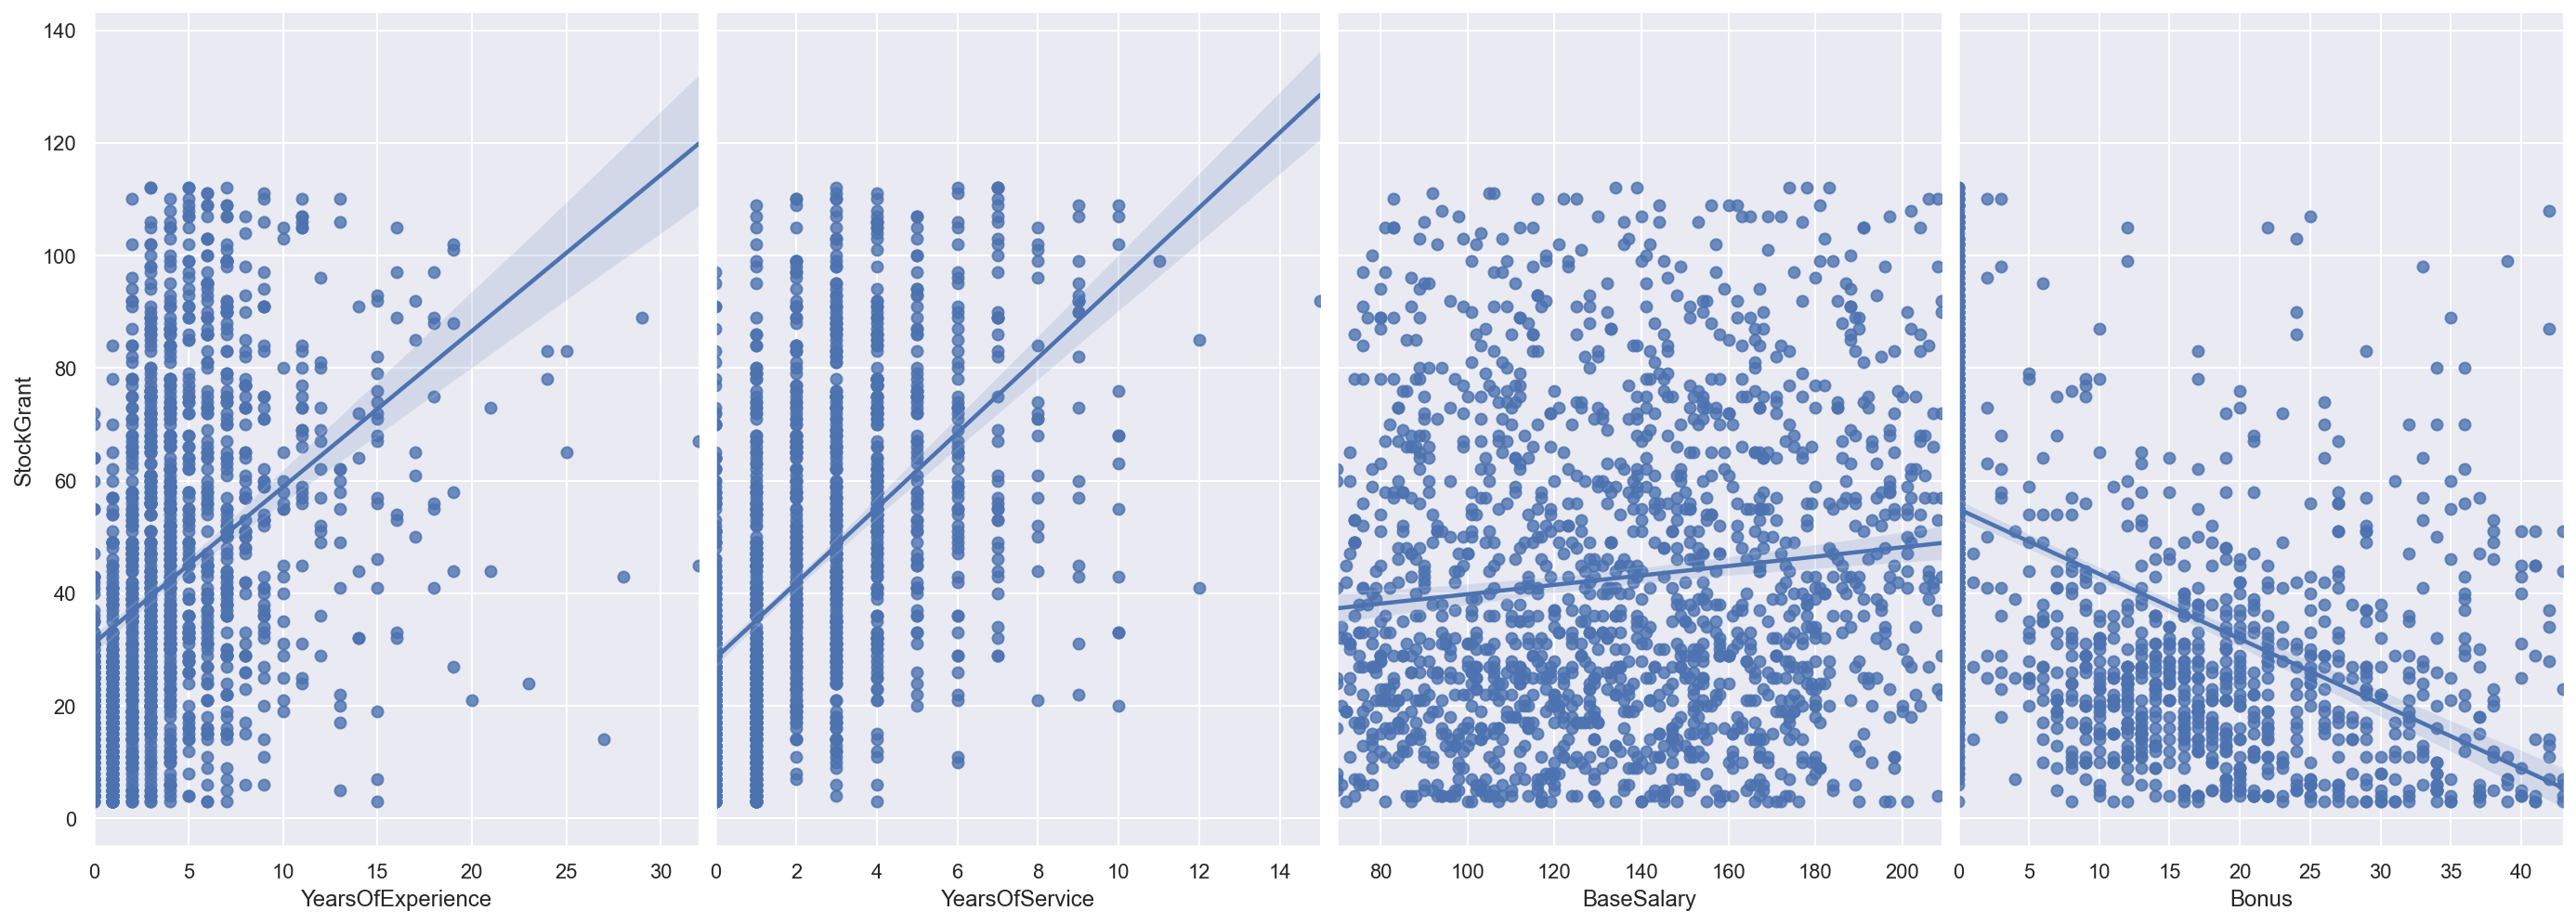

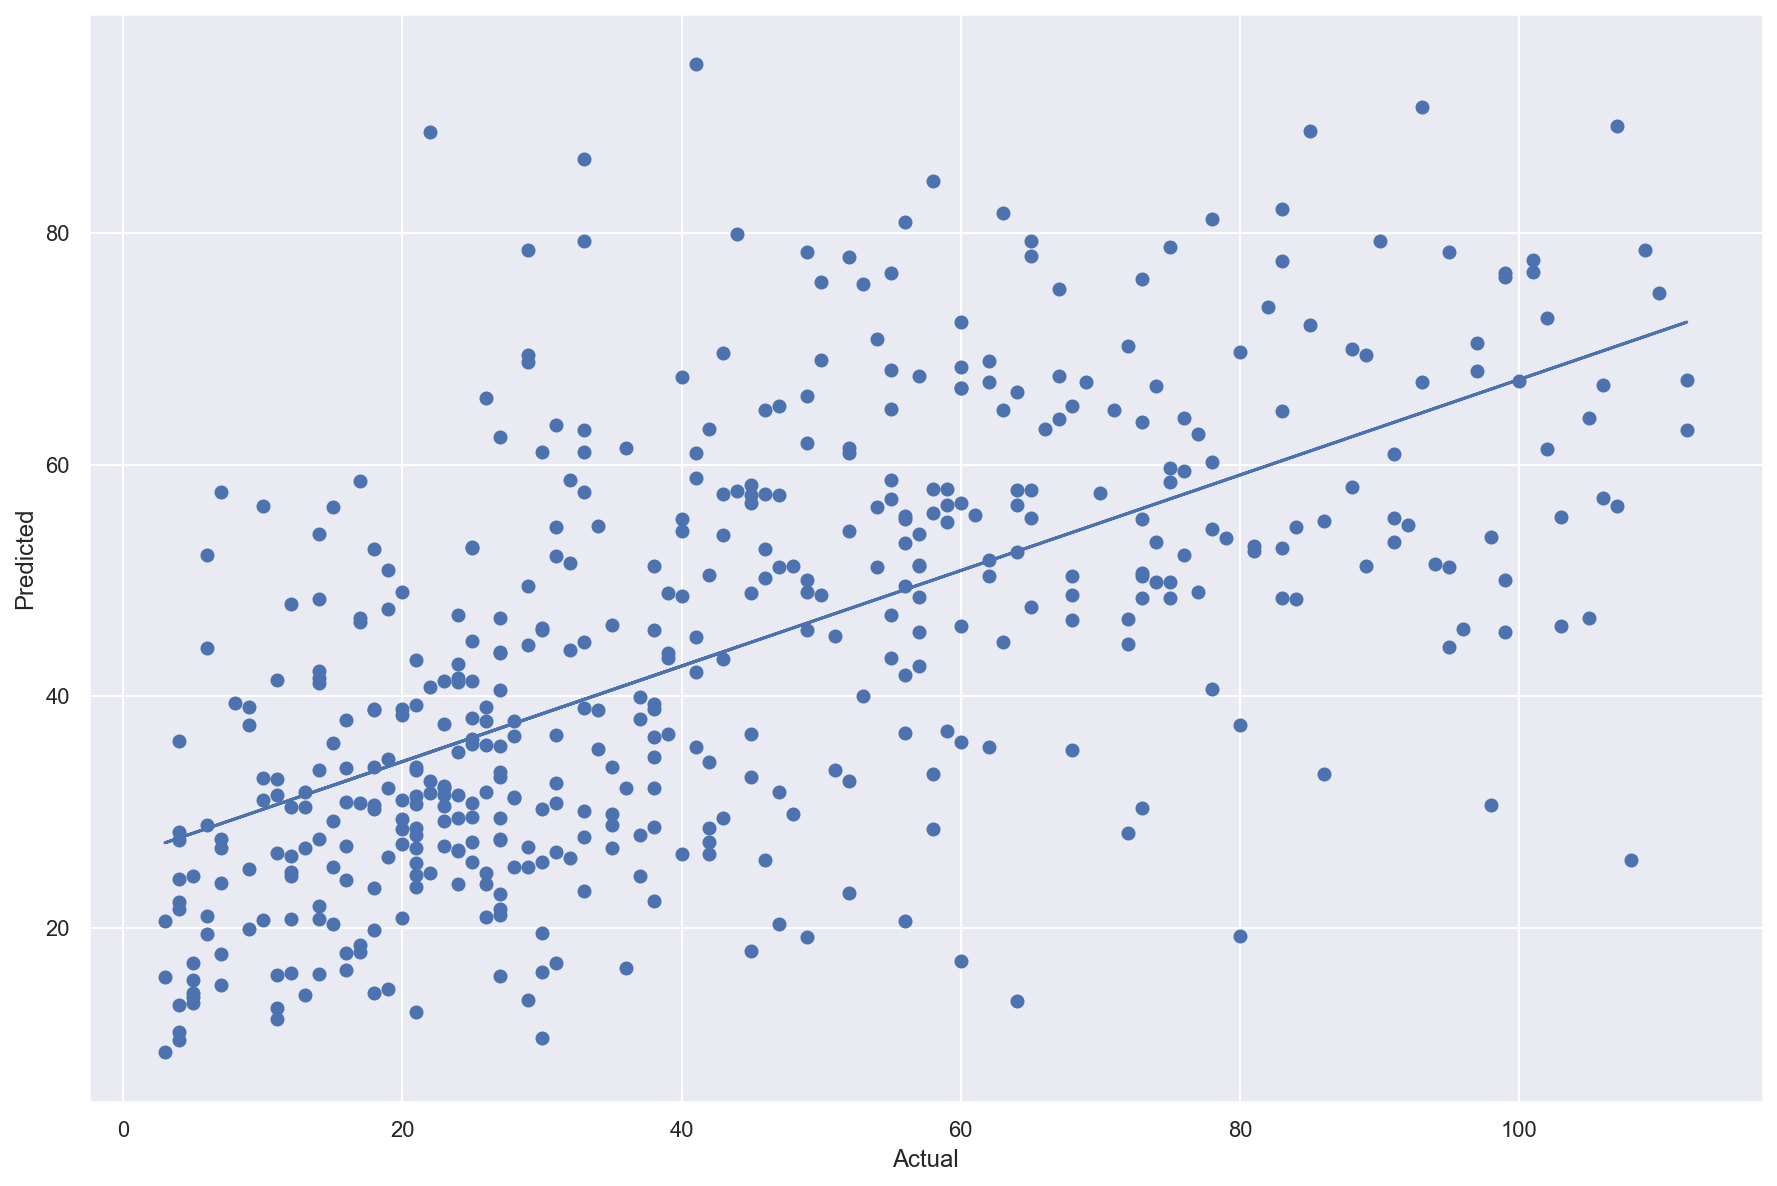

In [86]:

#Stock grant prediction based on individual companies
#Try Amazon
#Import the clean Levels.fyi data imported previously and filter it for AMAZON
Levels_Cleandf = pd.read_csv('Levels_clean.csv', index_col=0)
AMAZONdf = Levels_Cleandf[Levels_Cleandf['Company'].str.strip()=='AMAZON']
AMAZONdf = AMAZONdf[AMAZONdf['Title'].str.strip()=='Software Engineer']
AMAZONdf = AMAZONdf[AMAZONdf['Location'].str.contains("Seattle", na=False)]
AMAZONdf = AMAZONdf[AMAZONdf['BaseSalary']!= 0]

#Filter outliers - filter top and bottom 5% 
AMAZONdf = AMAZONdf[AMAZONdf['BaseSalary'].between(AMAZONdf['BaseSalary'].quantile(.05),AMAZONdf['BaseSalary'].quantile(.95))]
AMAZONdf = AMAZONdf[AMAZONdf['StockGrant'].between(AMAZONdf['StockGrant'].quantile(.05),AMAZONdf['StockGrant'].quantile(.95))]
AMAZONdf = AMAZONdf[AMAZONdf['Bonus'].between(AMAZONdf['Bonus'].quantile(.05),AMAZONdf['Bonus'].quantile(.95))]

AMAZONdf.to_csv('Amazondf.csv')

sns.pairplot(AMAZONdf, x_vars=['YearsOfExperience','YearsOfService','BaseSalary','Bonus'], y_vars='StockGrant', size=7, aspect=0.7, kind='reg')
#Stock Grant
#Extract the features into X
#Input Features - Years of Experience, Years of Service, Base Salary, Bonus, Stock Grant
feature_cols = ['YearsOfExperience','YearsOfService','BaseSalary','Bonus']
X=AMAZONdf[feature_cols].values

#StockGrant Prediction
#Extract and examine the output variable y
y = AMAZONdf['StockGrant'].values


#Split the dataset into a training set and testing set 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#Train the model -Perform Linear Regression on the training set
ml = LinearRegression()
ml.fit(X_train, y_train)

#Predicting the test set results to see if they are accurate
y_pred = ml.predict(X_test)

print ('\n\nAccuracy Percentage: ',r2_score(y_test, y_pred)*100,'%')
#71% accurate with a 50 50 split for test and train

#Create a scatterplot of the real test values versus the predicted values.
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

#To add regression line to scatterplot
#obtain m (slope) and b(intercept) of linear regression line
#m, b = np.polyfit(x, y, 1)
#add linear regression line to scatterplot 
#plt.plot(x, m*x+b)

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test,y_pred, 1)

#add linear regression line to scatterplot 
plt.plot(y_test, m*y_test+b)


#Print the Actual versus the predicted
pred_y_df=pd.DataFrame({'Actual Value': y_test,'Predicted Value':y_pred, 'Difference': y_test-y_pred})
pred_y_df[0:20]


References:
    https://towardsdatascience.com/a-beginners-guide-to-grabbing-and-analyzing-salary-data-in-python-e8c60eab186e
        
    https://www.datasciencelearner.com/yahoo-finance-api-python/
        
    https://www.youtube.com/watch?v=sgndYho8RyI
        
    https://www.analyticsvidhya.com/blog/2021/12/stock-market-analysis-with-pandas-datareader-and-plotly-for-beginners/
        
    https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
        
    https://github.com/JatinSadhwani02/Employee-Salary-Predictio-in-Machine-Learning/blob/master/Salary_Prediction_ML_Model.ipynb
        
    https://www.youtube.com/watch?v=WngoqVB6cXw
        
    https://www.statology.org/scatterplot-with-regression-line-python/
        
    https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6
        
    https://www.datasciencelearner.com/drop-unnamed-column-pandas/
        